### Problem Statement:
An education company named X Education sells online courses to industry professionals. The company markets its courses on several websites and search engines like Google. Professionals who are interested in the courses land on their website and browse for courses and fill up a form providing their email address or phone number, then they are classified to be a lead. Company also gets leads through past referrals. Once these leads are acquired, sales team connects with them. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

### Aim of the Case Study
Building a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.



### Data characteristics  of the Lead data :
- Prospect ID: A unique ID with which the customer is identified.
- Lead Number: A lead number assigned to each lead procured.
- Lead Origin: The origin identifier with which the customer was identified to be a lead.
- Lead Source: The source of the lead.
- Do Not Email/Do Not Call:	An indicator variable selected by the customer wherein they select whether of not they want to be emailed/called about the course or not.
- Converted: The target variable. Indicates whether a lead has been successfully converted or not.
- TotalVisits: The total number of visits made by the customer on the website.
- Total Time Spent on Website: The total time spent by the customer on the website.
- Page Views Per Visit: Average number of pages on the website viewed during the visits.
- Last Activity:Last activity performed by the customer.
- Country: The country of the customer.
- Specialization: The industry domain in which the customer worked before. 
- How did you hear about X Education: The source from which the customer heard about X Education.
- What is your current occupation: Indicates whether the customer is student/unemployed/employed. 
- What matters most to you in choosing this course:	An option selected by the customer indicating what is their main motto behind doing this course.
- Search: Indicating whether the customer had seen the ad in Magazine/Newspaper Article/	X Education Forums/Newspaper/Digital Advertisement.	
- Through Recommendations: Indicates whether the customer came in through recommendations.
- Receive More Updates About Our Courses: Indicates whether the customer chose to receive more updates about the courses.
- Tags: Tags assigned to customers indicating the current status of the lead.
- Lead Quality: Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.
- Update me on Supply Chain Content: Indicates whether the customer wants updates on the Supply Chain Content.
- Get updates on DM Content: Indicates whether the customer wants updates on the DM Content.
- Lead Profile:A lead level assigned to each customer based on their profile.
- City:The city of the customer.
- Asymmetrique Activity Index /Profile Index/Activity Score/Profile Score: An index and score assigned to each customer based on their activity and their profile
- I agree to pay the amount through cheque: Indicates whether the customer has agreed to pay the amount through cheque or not.
- a free copy of Mastering The Interview: Indicates whether the customer wants a free copy of 'Mastering the Interview' or not.
- Last Notable Activity: The last notable acitivity performed by the student.


### 1. Reading and Understanding the Data.

In [1]:
#Importing pandas ,numpy, matplotlib and seaborn libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(color_codes =True)

In [2]:
# Supress Warnings.
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Reading the leads csv and storing in lead_df dataframe.
lead_df = pd.read_csv("Leads.csv")

In [4]:
#Displaying the lead_df top 5 rows.
lead_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### 2. Inspecting the Data frame.

In [5]:
#Understanding total number of row and column entries.
lead_df.shape

(9240, 37)

- There are 9240 data entries with 37 data columns.

In [6]:
#Understanding table information.
lead_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

- In total ,there are 7 numeric values [float64(4), int64(3)] and 30 categorical values.

#### - Undestanding Categorical variable.

In [7]:
#Understanding catrgorical Values and finding the Invalid values in categorical variables.
lead_df.iloc[:,:15].select_dtypes(include='object').describe(include='all')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550
unique,9240,5,21,2,2,17,38,19,10,6
top,ae843ab0-8b6a-407c-91b2-bddc29922dd1,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600


In [8]:
lead_df.iloc[:,15:].select_dtypes(include='object').describe(include='all')

,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


#### Top findings:
 
1. Columns 'Magazine', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', and 'I agree to pay the amount through cheque' has only one unique value associated with them.             
2. Other columns have more than one unique value.
3. Columns like 'Specialization', 'How did you hear about X Education', and 'Lead ProfileFound' as entry called 'select’, which signifies user has not entered data for this field, so this has to be treated as missing entry.
4.  No invalid entries found for other categorical columns.



#### - Understanding Numerical columns.

In [9]:
# Understanding the Numerical data columns
lead_df.select_dtypes(include=['int64','float64']).describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


#### Top findings:
Based on statistical distribution numerical columns look good for analysis.

### 3. EDA Analysis .


In [10]:
# Creating a deep copy of the data frame for modification.
leadcopy_df = lead_df.copy(deep=True)

In [11]:
# Replacing Select value in columns with missing value .
leadcopy_df = leadcopy_df.replace('Select', np.nan)

#### 3.1 Checking and Handling Missing values.

In [12]:
# Defining a function to capture null values in a sorted order.
def Null_percentage(df):
    return round((df.isnull().mean()).sort_values(ascending=False),4)*100

In [13]:
Null_percentage(leadcopy_df)

How did you hear about X Education               78.46
Lead Profile                                     74.19
Lead Quality                                     51.59
Asymmetrique Profile Score                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Index                      45.65
City                                             39.71
Specialization                                   36.58
Tags                                             36.29
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
Country                                          26.63
TotalVisits                                       1.48
Page Views Per Visit                              1.48
Last Activity                                     1.11
Lead Source                                       0.39
Lead Origin                                       0.00
Lead Numbe

- Missing value treatment for columns with more than 45% of missing values creates bias to final prediction. So it is a good to drop this columns.


##### 3.1.1. Dropping 'How did you hear about X Education','Lead Profile','Lead Quality','Asymmetrique Profile Score','Asymmetrique Activity Score', 'Asymmetrique Profile Index','Asymmetrique Activity Index'.

In [14]:
# The columns with more than or equal to 45 % of empty values are dropped.
drp_list =[]
for col in leadcopy_df.columns:
    if(leadcopy_df[col].isnull().sum()/leadcopy_df.shape[0] >= 0.45):
        drp_list.append(col)
        
leadcopy_df.drop(columns = drp_list,inplace=True)

##### 3.1.2. Dropping Columns 'Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content', and 'I agree to pay the amount through cheque' having only one unique entry.

In [15]:
# Dropping columns that has only single unique value.
Unique_copy = leadcopy_df.nunique()
drp_clmn = Unique_copy[Unique_copy == 1].index

leadcopy_df.drop(columns = drp_clmn,inplace=True)

In [16]:
# The shape of the data frame after the dropping of unwanted columns.
leadcopy_df.shape

(9240, 25)

##### 3.1.2. Missing Value treatment for categorical data.

In [17]:
# Categorical Data count plot to treat missing value:
cat_data = leadcopy_df.select_dtypes(include='object').isnull().sum()/len(leadcopy_df)
col_ind = cat_data[cat_data > 0].sort_values(ascending=False).index

#defining a custom count plot.
def Count_plot(df,col):
    plt.figure(figsize=[16,12])
    ax = sns.countplot(df[col],orient='v')
    for pt in ax.patches:
        height = pt.get_height()
        ax.text(pt.get_x()+pt.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(height/len(df) * 100),
                ha="center")
    plt.title("Understanding column {}".format(col),color='green',fontsize =12)
    plt.xticks(rotation =90,fontsize =12)
    plt.xlabel(col,color='blue',fontsize =12)
    plt.tight_layout()
    plt.show();

#checking percentage of missing value.
print(round(cat_data[cat_data > 0].sort_values(ascending=False)*100,4))

City                                             39.7078
Specialization                                   36.5801
Tags                                             36.2879
What matters most to you in choosing a course    29.3182
What is your current occupation                  29.1126
Country                                          26.6342
Last Activity                                     1.1147
Lead Source                                       0.3896
dtype: float64


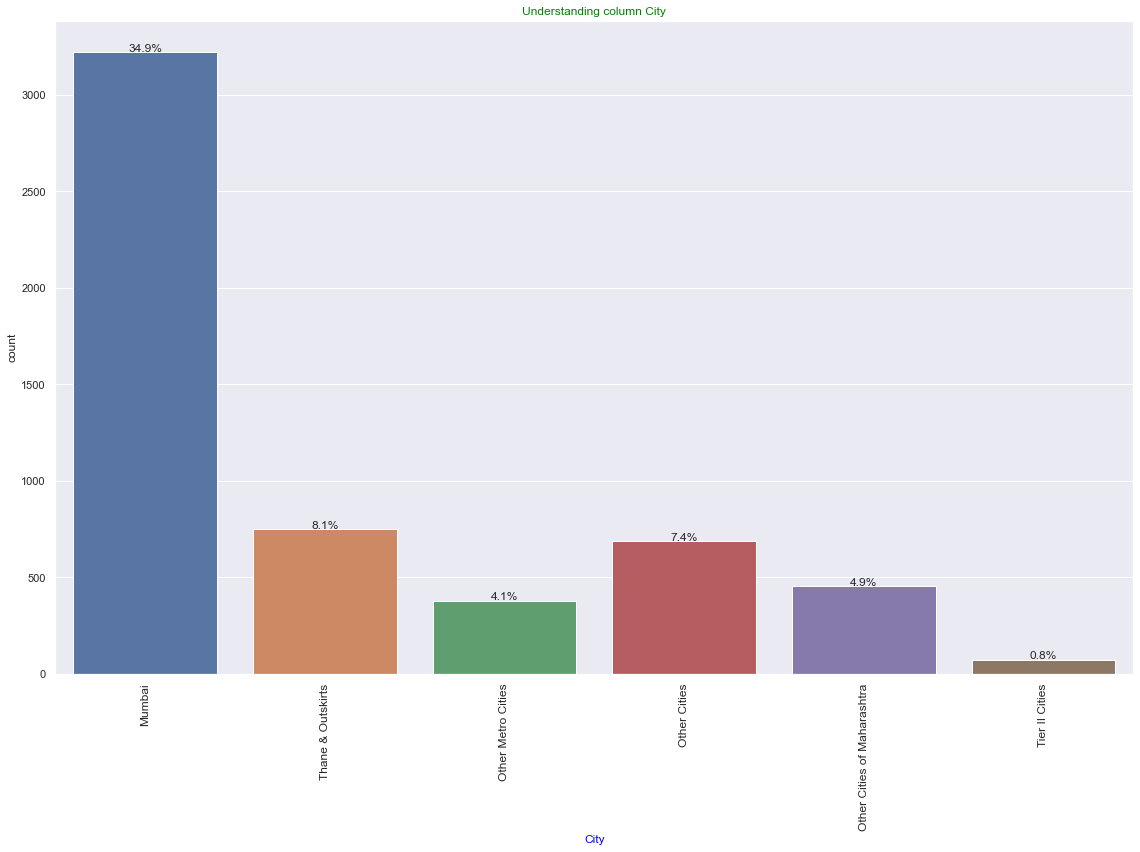

In [18]:
# Missing value treatment for 'City'.
Count_plot(leadcopy_df,'City')

- For City column percentage of missing value is comparable to Mode value 'Mumbai'. It is good idea to impute missing value with 'Mumbai'.

In [19]:
# Fill missing value with Mumbai .
leadcopy_df['City'].fillna('Mumbai', inplace=True)

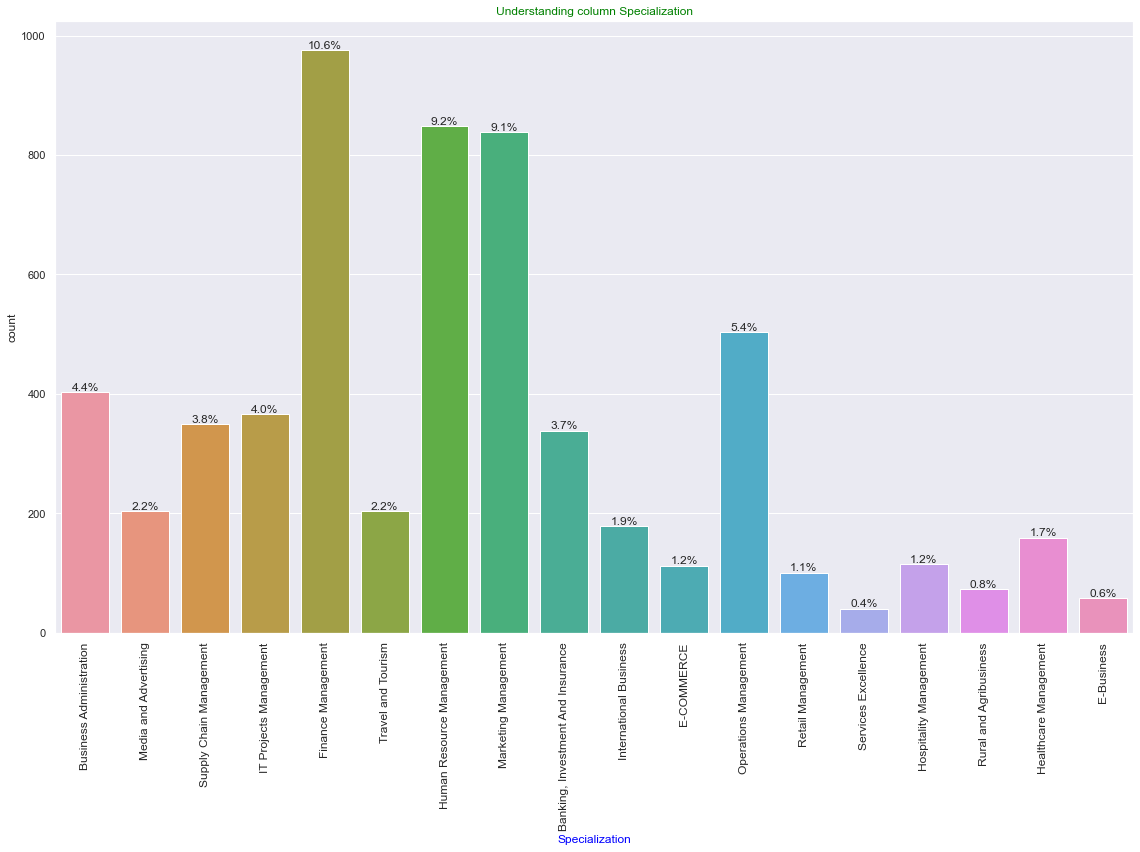

In [20]:
# Missing value treatment for 'Specialization'.
Count_plot(leadcopy_df,'Specialization')

- Specialization column has equal share from finance, marketing and human resource courses, and there are chances that user might be interested in other specialization that were not part of the course list. Treating missing values with new variable called 'Other-Specialization'.

In [21]:
# Converting missing values to Other-Specialization
leadcopy_df['Specialization'] = leadcopy_df['Specialization'].replace(np.nan, 'Other-Specialization')

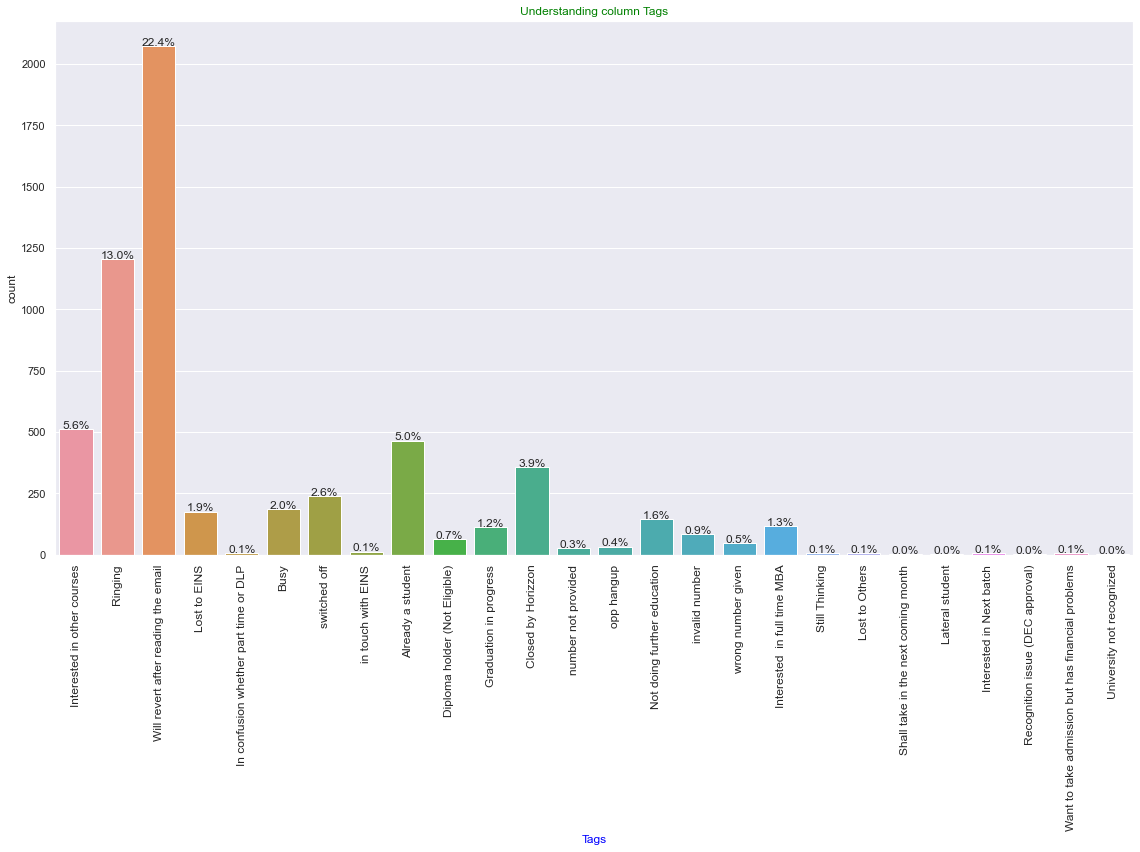

In [22]:
# Missing value treatment for 'Tags'.
Count_plot(leadcopy_df,'Tags')

- Tags column as 37% missing column and it is good idea to treat missing data with separate indicator variable .Treating missing values with new variable called 'Not-Mentioned'.

In [23]:
# Converting missing values to Not-Mentioned.
leadcopy_df['Tags'] = leadcopy_df['Tags'].replace(np.nan, 'Not-Mentioned')

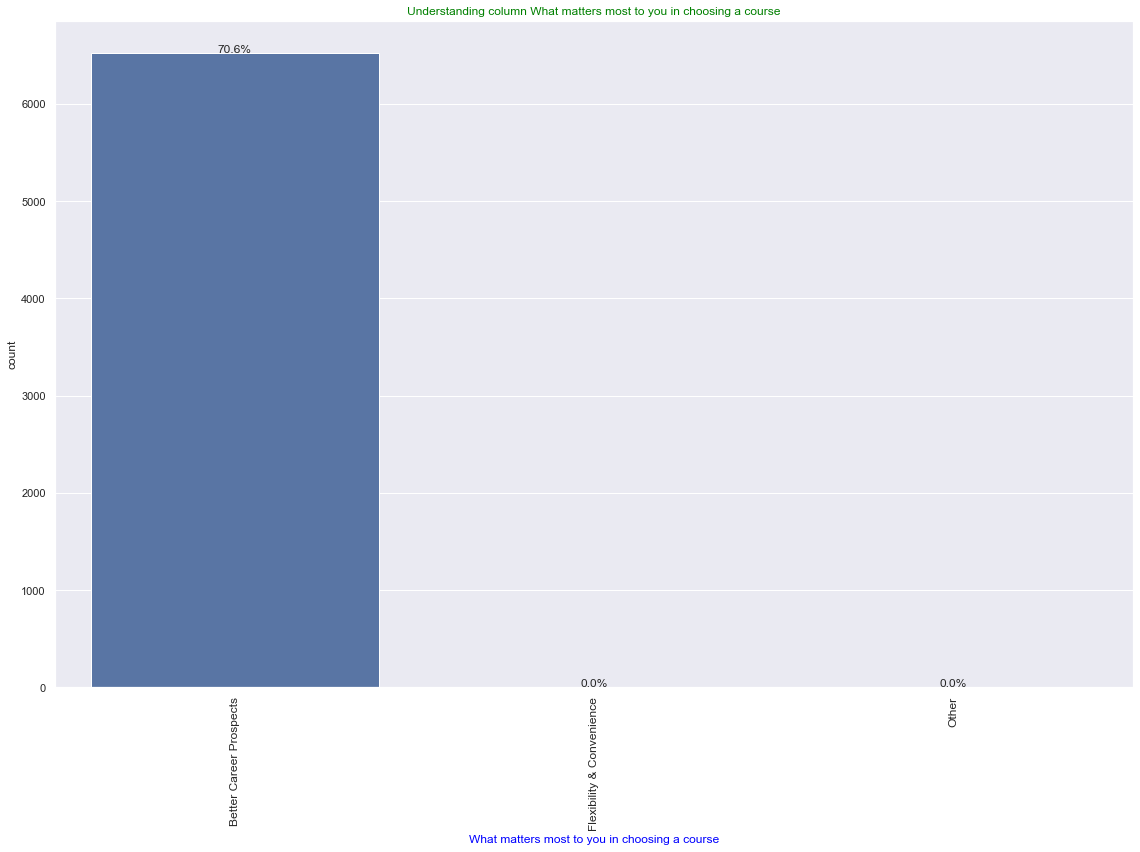

In [24]:
# Missing value treatment for 'What matters most to you in choosing a course'.
Count_plot(leadcopy_df,'What matters most to you in choosing a course')

- Data looks highly biased towards better career prospective and thus it will not create significant contribution towards model building. It is better to drop this column.

In [25]:
#Dropping Column 'What matters most to you in choosing a course'.
leadcopy_df.drop(columns = 'What matters most to you in choosing a course',inplace=True)

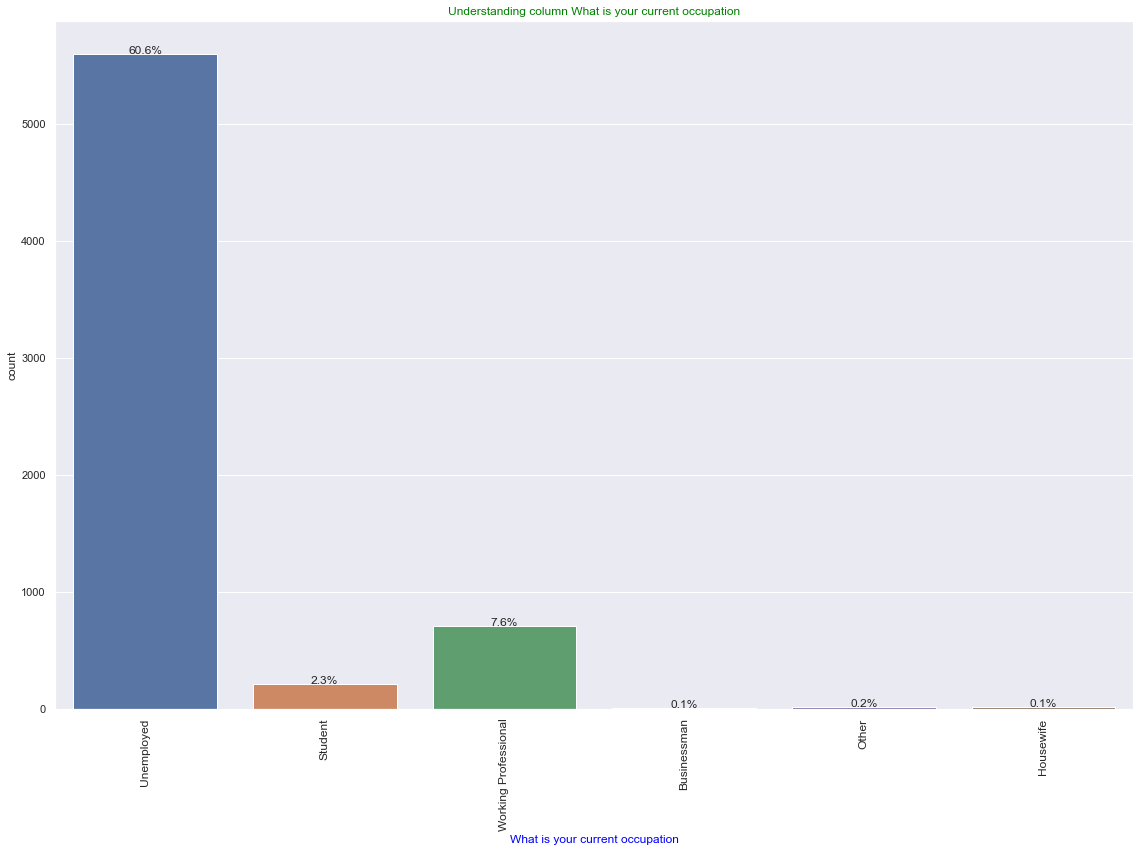

In [26]:
# Missing value treatment for 'What is your current occupation'.
Count_plot(leadcopy_df,'What is your current occupation')

- There might be other occupations not listed in the data set. So, It is good idea to impute missing value with ‘Not Specified’ entry.

In [27]:
# Fill missing value with Not-Specified .
leadcopy_df['What is your current occupation'].fillna('Not-Specified', inplace=True)

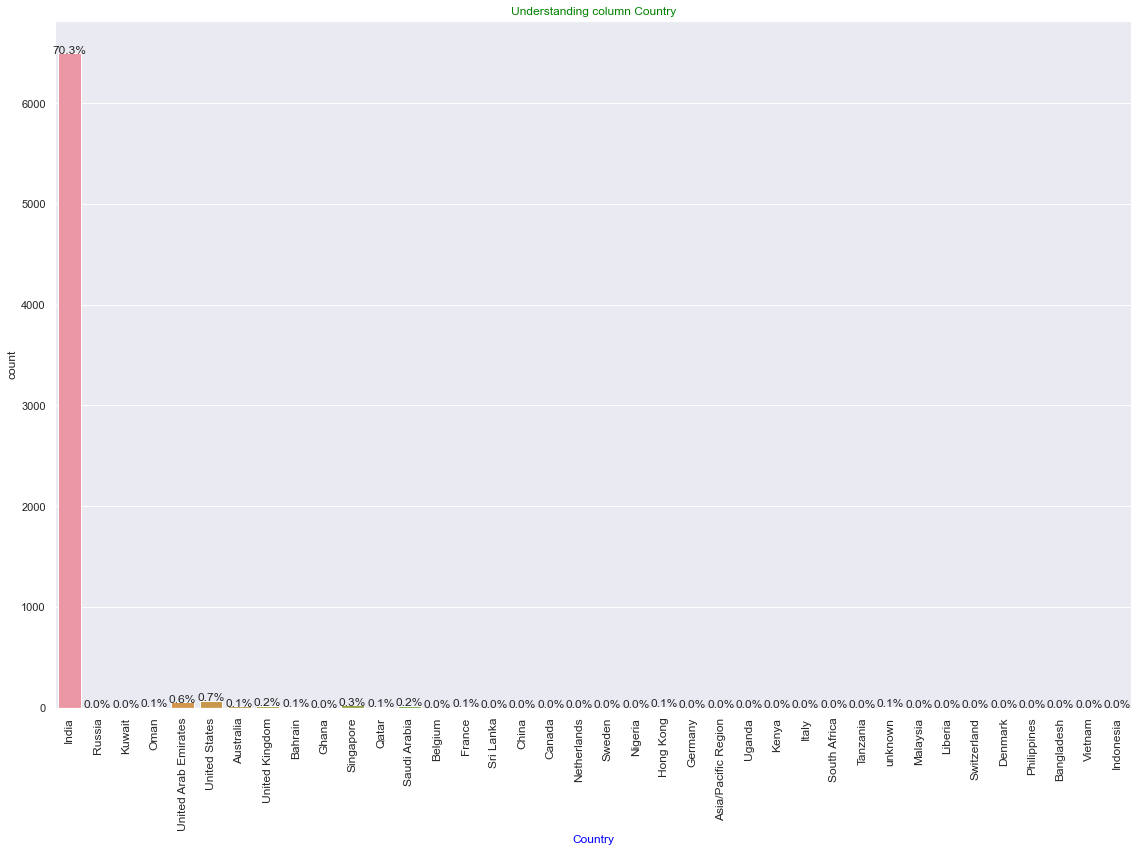

In [28]:
# Missing value treatment for 'Country'.
Count_plot(leadcopy_df,'Country')

- Data looks highly biased towards India and thus it will not create significant contribution towards model building. It is better to drop this column.

In [29]:
#Dropping Column 'Country'.
leadcopy_df.drop(columns ='Country',inplace=True)

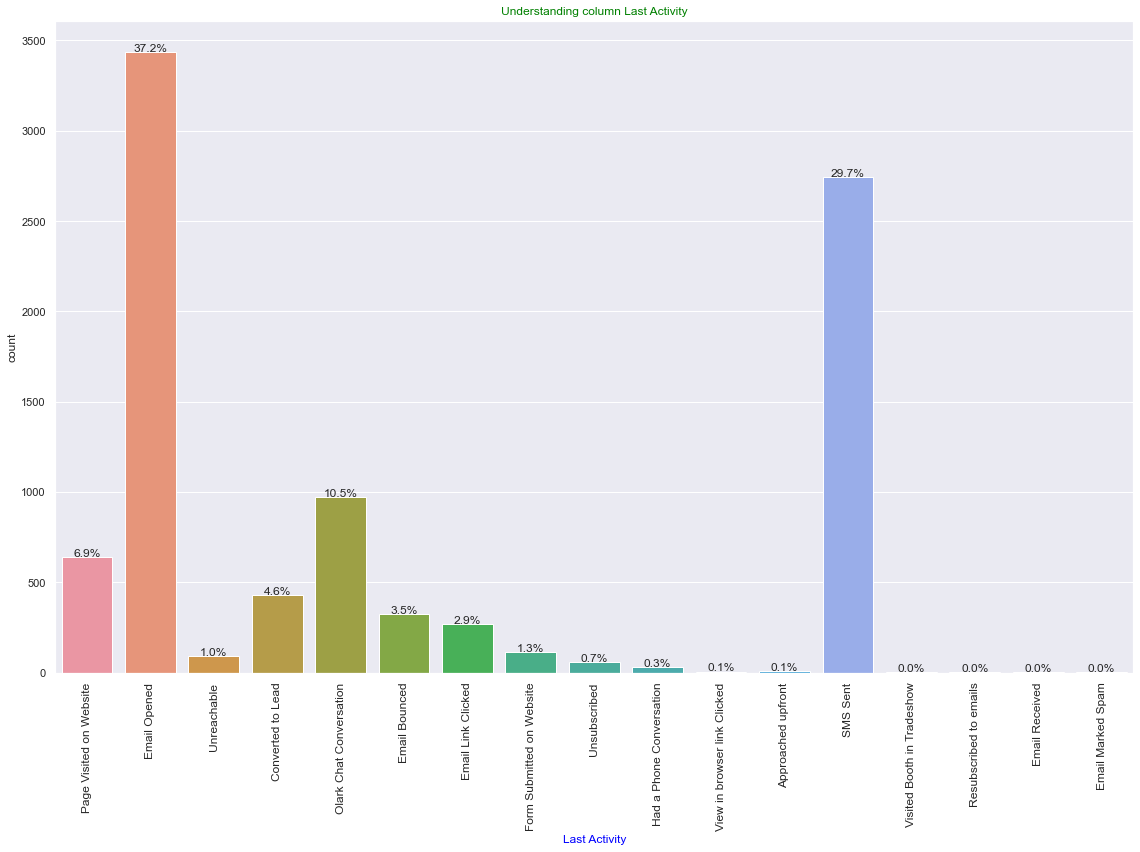

In [30]:
# Missing value treatment for 'Last Activity'.
Count_plot(leadcopy_df,'Last Activity')

- Last Activity column as 1.1% missing data and it is good idea to treat missing data with separate indicator variable .Treating missing values with new variable called 'Other-Activity'.

In [31]:
# Converting missing values to Other-Activity.
leadcopy_df['Last Activity'] = leadcopy_df['Last Activity'].replace(np.nan, 'Other-Activity')

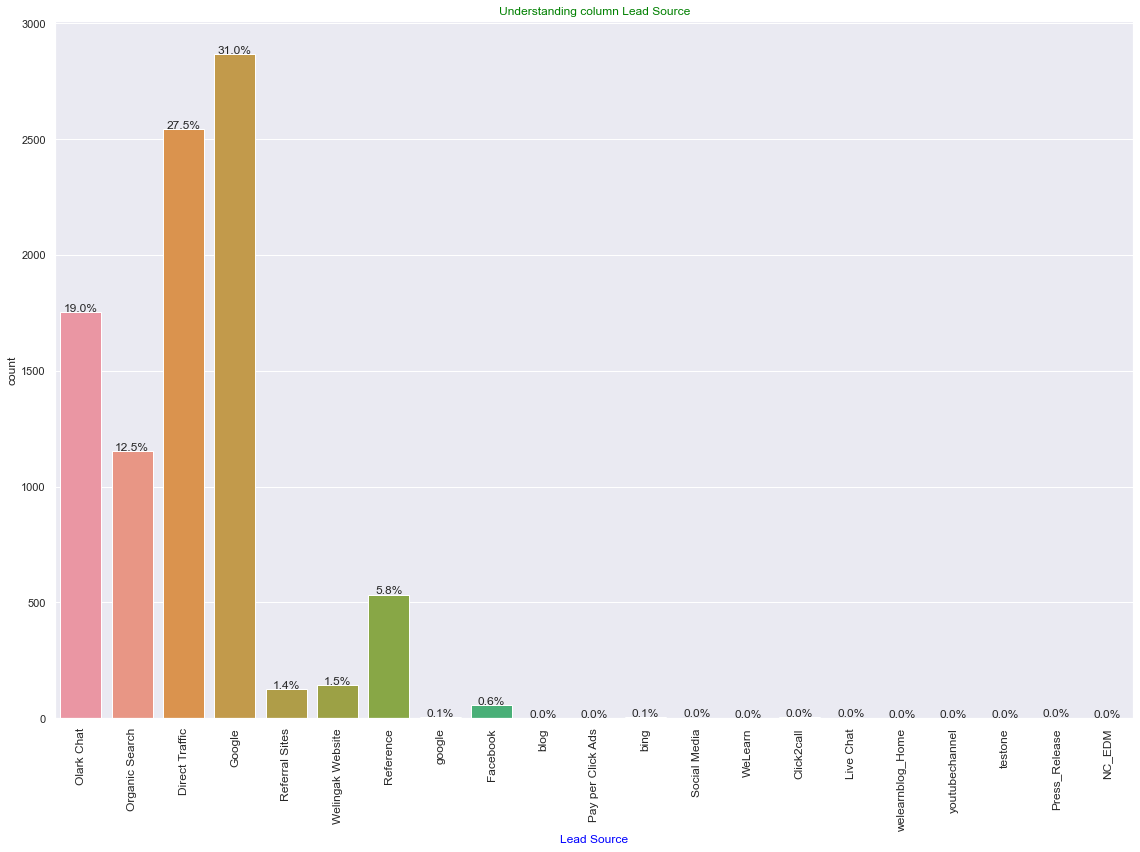

In [32]:
# Missing value treatment for 'Lead Source'.
Count_plot(leadcopy_df,'Lead Source')

- Lead Source column as 0.4% missing data and it is good idea to treat missing data with separate indicator variable .Treating missing values with new variable called 'Other-Source'.

In [33]:
# Converting missing values to Other-Source.
leadcopy_df['Lead Source'] = leadcopy_df['Lead Source'].replace(np.nan, 'Other-Source')

##### 3.1.3. Missing Value treatment for Numerical data.

In [34]:
# Numerical Data missing value percentage:
Num_data = leadcopy_df.select_dtypes(include=['int64','float64']).isnull().sum()/len(leadcopy_df)
Num_data[Num_data > 0].sort_values(ascending=False)*100

Page Views Per Visit    1.482684
TotalVisits             1.482684
dtype: float64

- It is good idea to drop 1.4% of missing data.  

In [35]:
#Dropping missing data from dataset.
leadcopy_df.dropna(inplace=True)

In [36]:
#checking the shape of the dataframe.
leadcopy_df.shape

(9103, 23)

In [37]:
#Checking the Missing value percentage.
leadcopy_df.isnull().sum()/len(leadcopy_df)*100

Prospect ID                               0.0
Lead Number                               0.0
Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Do Not Call                               0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
Last Activity                             0.0
Specialization                            0.0
What is your current occupation           0.0
Search                                    0.0
Newspaper Article                         0.0
X Education Forums                        0.0
Newspaper                                 0.0
Digital Advertisement                     0.0
Through Recommendations                   0.0
Tags                                      0.0
City                                      0.0
A free copy of Mastering The Inter

In [38]:
# Creating a deep copy of the data frame for Final Target Lead Score prediction.
leadcopy_TargetScorePred_df = leadcopy_df.copy(deep=True)

### 3.2 Univariate Analysis.

##### 3.2.1 Numerical Data - outlier treatment.

In [39]:
# Checking outliers at 25%, 50%, 75%, 90%, 95% and 99%
leadcopy_df.describe(percentiles=[.25, .5, .75, .90, .95, .99])

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9103.000000,9103.000000,9103.000000,9103.000000,9103.000000
mean,617027.742612,0.380204,3.445238,481.350104,2.362820
std,23337.138926,0.485464,4.854853,545.066142,2.161418
min,579533.000000,0.000000,0.000000,0.000000,0.000000
25%,596408.000000,0.000000,1.000000,9.000000,1.000000
50%,615278.000000,0.000000,3.000000,244.000000,2.000000
75%,637166.000000,1.000000,5.000000,919.500000,3.000000
90%,650254.000000,1.000000,7.000000,1372.000000,5.000000
95%,655337.900000,1.000000,10.000000,1556.900000,6.000000
99%,659561.860000,1.000000,17.000000,1838.960000,9.000000


In [40]:
#defining a custom numeric plot for outlier analysis.
def Numeric_plot(df,col,target):
    plt.figure(figsize=[12,6])
    ax1 = plt.subplot(1,2,1)
    sns.distplot(df[df[target] == 0].loc[:,col],hist=True,color='aqua',label='Non-Potential_Lead')
    sns.distplot(df[df[target] == 1].loc[:,col],hist=True,color='orange',label='Potential_Lead')
    ax1.legend()
    plt.title("understanding column {}".format(col),color='green',fontsize =12)
    plt.ylabel(col,color='blue',fontsize =10)
    plt.xlabel('Data distribution of {}'.format(col),color='blue',fontsize =10)
    ax2 = plt.subplot(1,2,2)
    sns.boxplot(x=target,y=col,data=df)
    plt.title("Plot of Converted VS {}".format(col),color='green',fontsize =12)
    plt.ylabel(col,color='blue',fontsize =10)
    plt.xticks([0,1],['Non-Potential_Lead','Potential_Lead'])
    plt.tight_layout()
    plt.show();

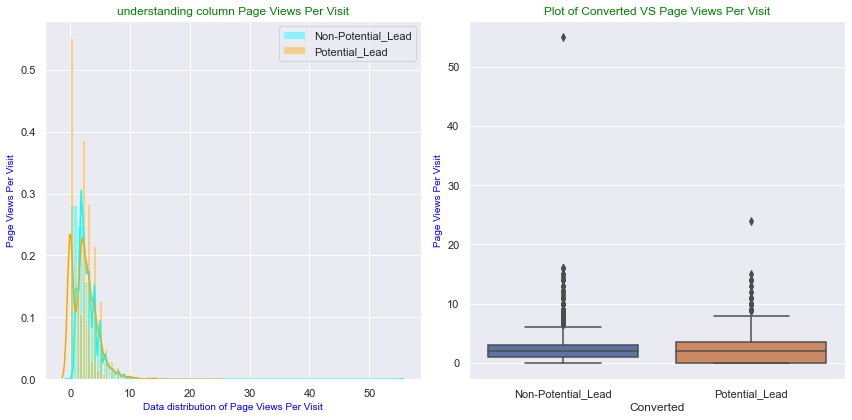

In [41]:
#Outlier treatment of Page Views Per Visit.
Numeric_plot(leadcopy_df,'Page Views Per Visit','Converted')

- Median value of both distribution are similar and no significant difference between both the distribution, capping the outliers to 99 or 1 percentile value.

In [42]:
#Capping the values with q1 and q4 values.
q1 = leadcopy_df['Page Views Per Visit'].quantile(0.01) 
q4 = leadcopy_df['Page Views Per Visit'].quantile(0.99) 

leadcopy_df['Page Views Per Visit'][leadcopy_df['Page Views Per Visit']<=q1] = q1  
leadcopy_df['Page Views Per Visit'][leadcopy_df['Page Views Per Visit']>=q4] = q4 

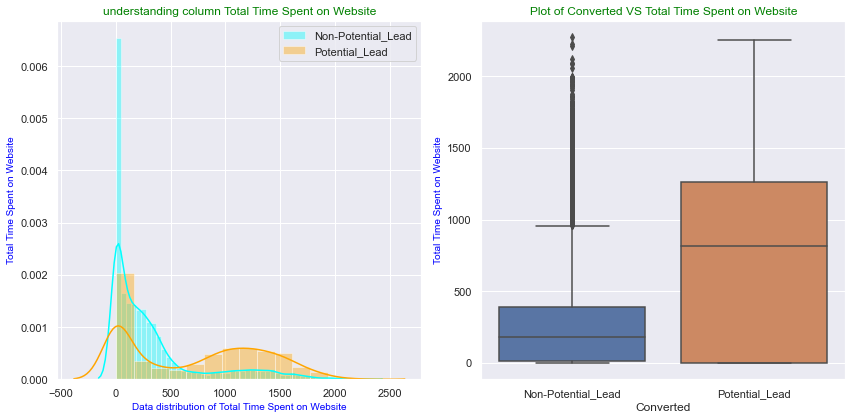

In [43]:
#Outlier treatment of 'Total Time Spent on Website' .
Numeric_plot(leadcopy_df,'Total Time Spent on Website','Converted')

- Potential lead tend to spend most time on website and this could be an indicator variable for conversion. No outliers seen and thus outlier treatment is not required.

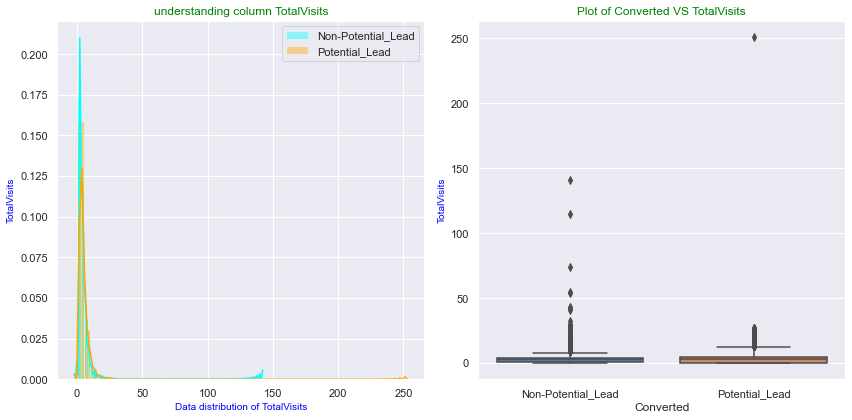

In [44]:
#Outlier treatment of 'TotalVisits' .
Numeric_plot(leadcopy_df,'TotalVisits','Converted')

- Median value of both distribution are similar and no significant difference between both the distribution, capping the outliers to 99 or 1 percentile value.

In [45]:
#Capping the values with q1 and q4 values.
q1 = leadcopy_df['TotalVisits'].quantile(0.01) 
q4 = leadcopy_df['TotalVisits'].quantile(0.99) 

leadcopy_df['TotalVisits'][leadcopy_df['TotalVisits']<=q1] = q1  
leadcopy_df['TotalVisits'][leadcopy_df['TotalVisits']>=q4] = q4

#### 3.2.2. Categorical Data - Binary classified data.

In [46]:
# Checking columns that has Two  unique value.
Uniq2_copy = leadcopy_df.nunique()
Uniq2_copy[Uniq2_copy == 2]

Do Not Email                              2
Do Not Call                               2
Converted                                 2
Search                                    2
Newspaper Article                         2
X Education Forums                        2
Newspaper                                 2
Digital Advertisement                     2
Through Recommendations                   2
A free copy of Mastering The Interview    2
dtype: int64

In [47]:
#Defining a custom count plot with target variable.
def Count_Target_plot(df,col,target):
    plt.figure(figsize=[8,8])
    ax = sns.countplot(x=col, hue=target,data=df)
    for pt in ax.patches:
        height = pt.get_height()
        ax.text(pt.get_x()+pt.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(height/len(df) * 100),
                ha="center")
    plt.title("Understanding column {}".format(col),color='green',fontsize =12)
    plt.xticks(rotation =90,fontsize =12)
    plt.xlabel(col,color='blue',fontsize =12)
    plt.tight_layout()
    plt.show();

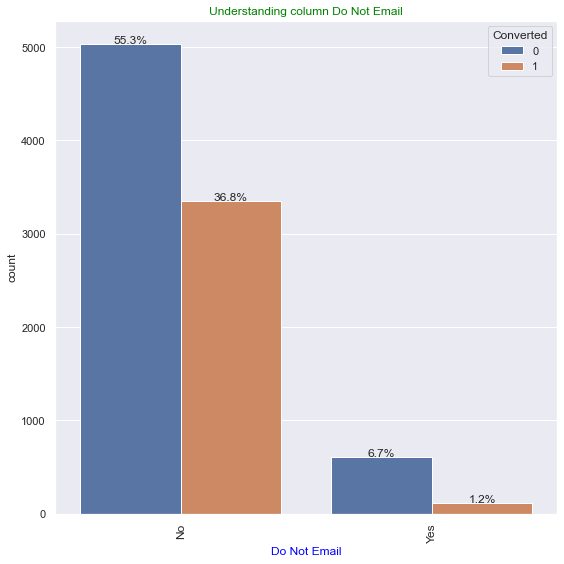

posx and posy should be finite values
posx and posy should be finite values


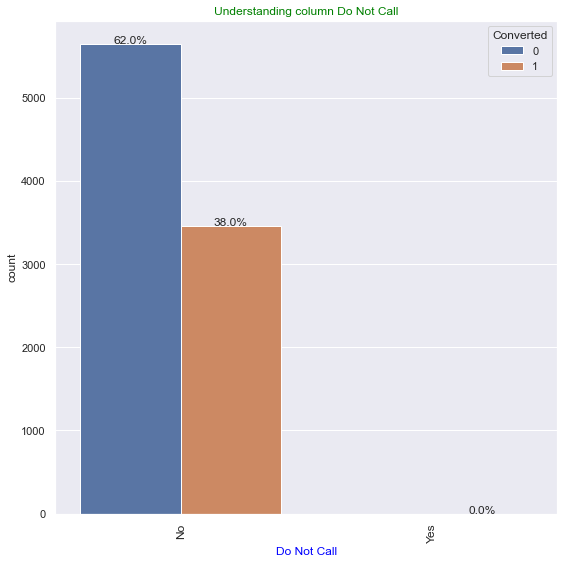

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


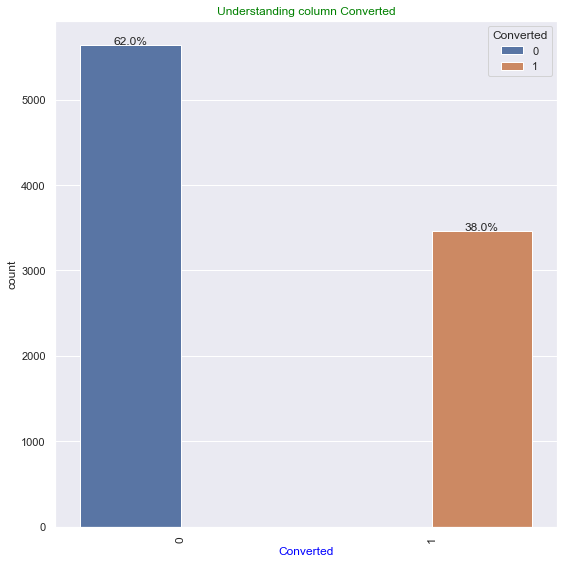

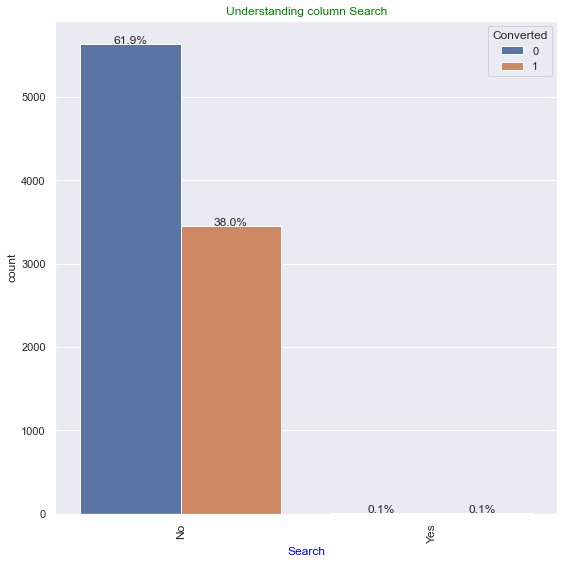

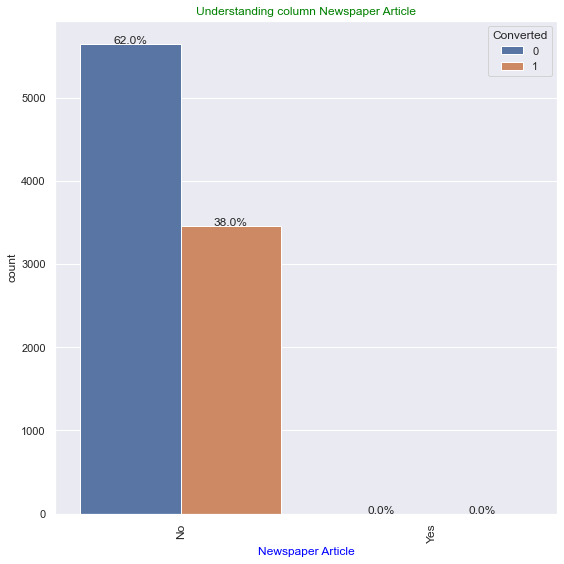

posx and posy should be finite values
posx and posy should be finite values


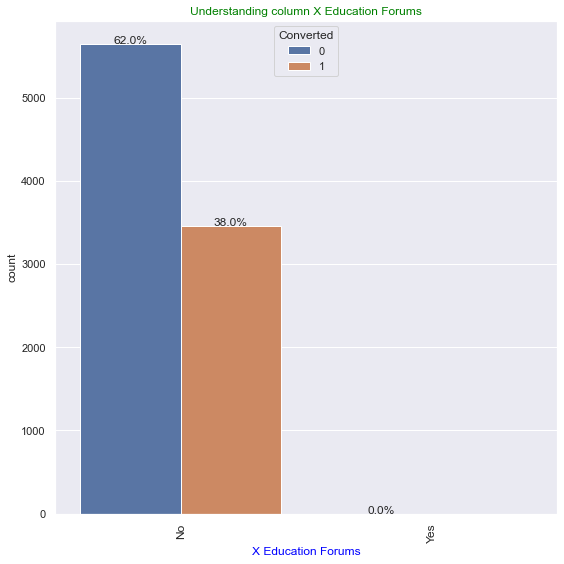

posx and posy should be finite values
posx and posy should be finite values


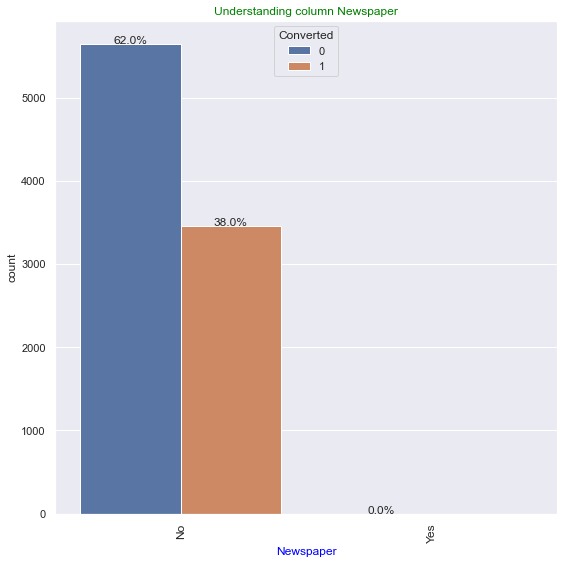

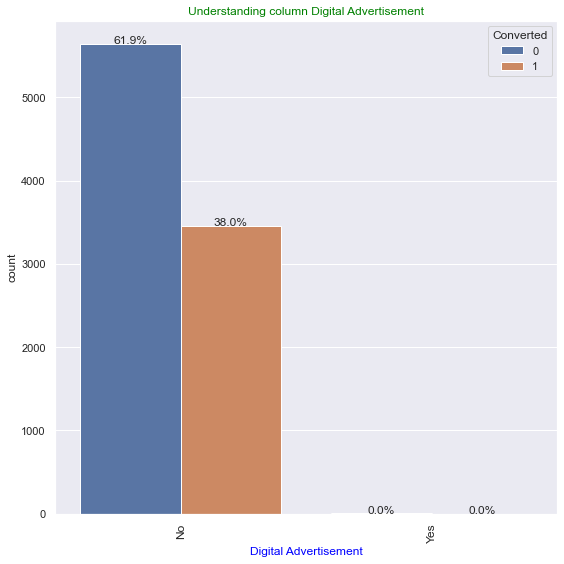

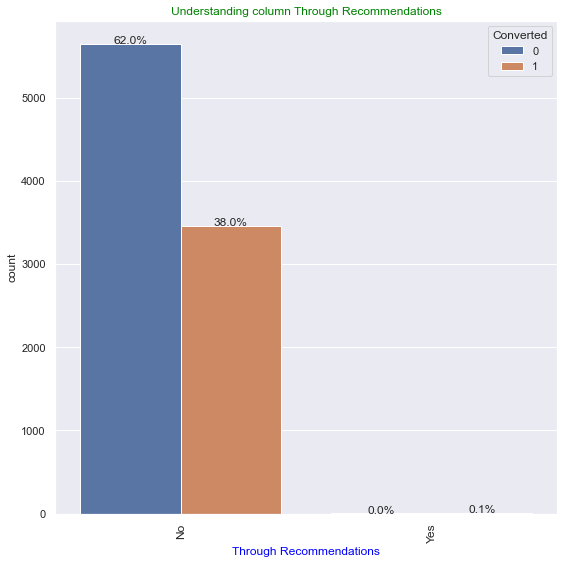

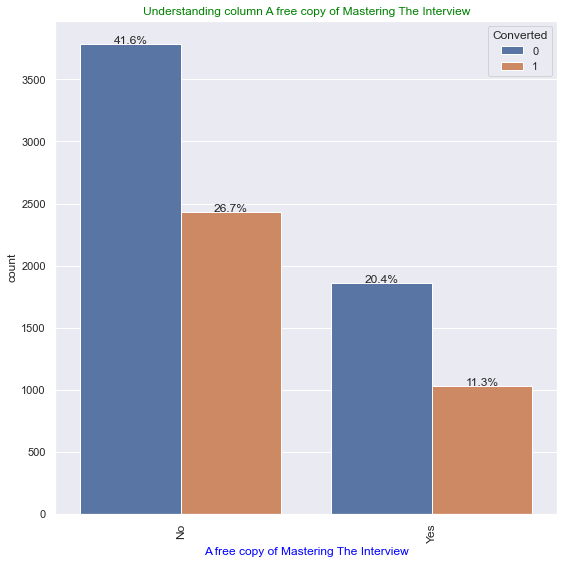

In [48]:
#Plotting count plot to check the data distribution.

for col in Uniq2_copy[Uniq2_copy == 2].index :
    Count_Target_plot(leadcopy_df,col,'Converted')

- Except 'A free copy of Mastering The Interview' and 'Do Not Email' columns all other binary columns are highly skewed toward NO, So this variables will not be helpful in final model building. Dropping all the skewed data variable.

In [49]:
# Dropping columns 'Do Not Call', 'Search','Newspaper Article',
#'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations'.

drp_clmns =['Do Not Call', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper',
            'Digital Advertisement', 'Through Recommendations']

leadcopy_df.drop(columns = drp_clmns,inplace=True)

In [50]:
# Changing yes to 1 and no to 0 .

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, "No": 0})

# Applying the function to the 'A free copy of Mastering The Interview', 'Do Not Email'.
leadcopy_df[['Do Not Email','A free copy of Mastering The Interview']] = leadcopy_df[['Do Not Email','A free copy of Mastering The Interview']].apply(binary_map)

#### 3.2.3. Categorical Data - Multi class classified data.

In [51]:
# Checking columns that are Multi class classified data.
Uniqm_copy = leadcopy_df.select_dtypes(include='object').nunique()
Uniqm_copy[Uniqm_copy > 2]

Prospect ID                        9103
Lead Origin                           4
Lead Source                          22
Last Activity                        17
Specialization                       19
What is your current occupation       7
Tags                                 27
City                                  6
Last Notable Activity                16
dtype: int64

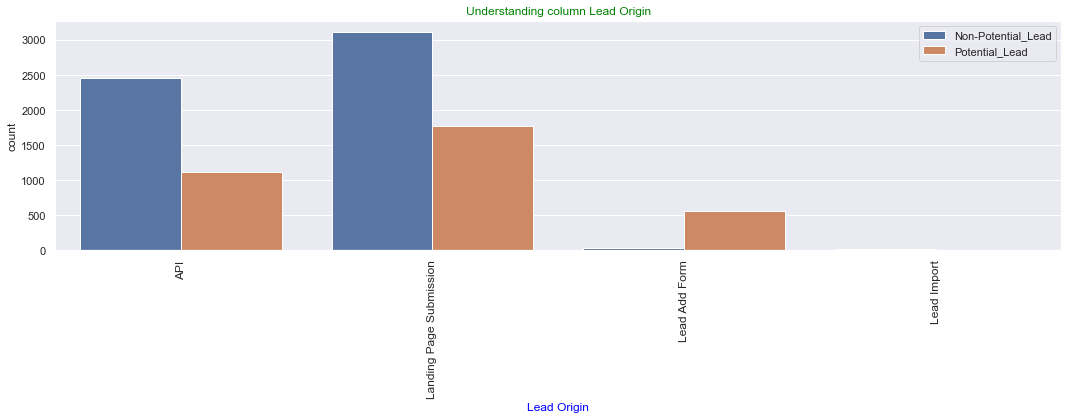

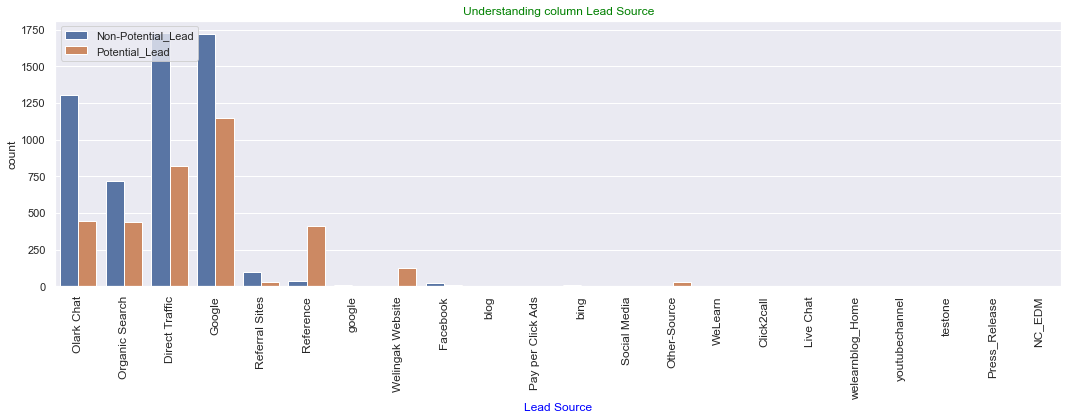

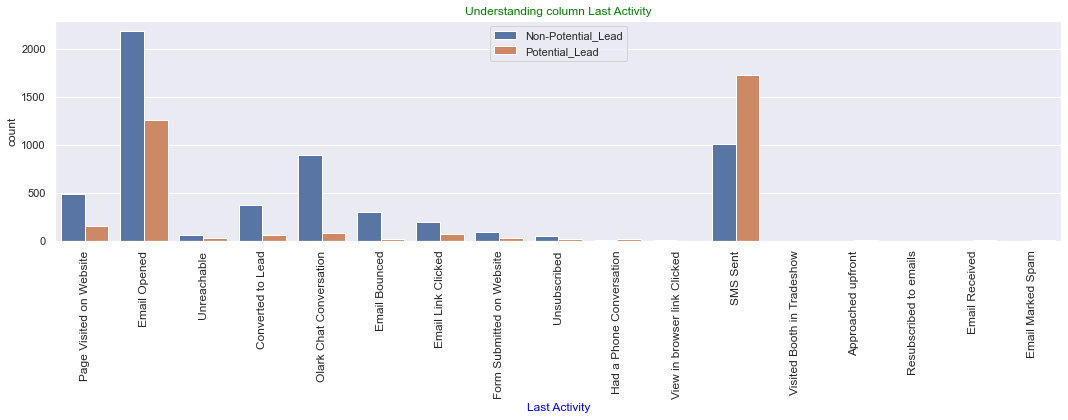

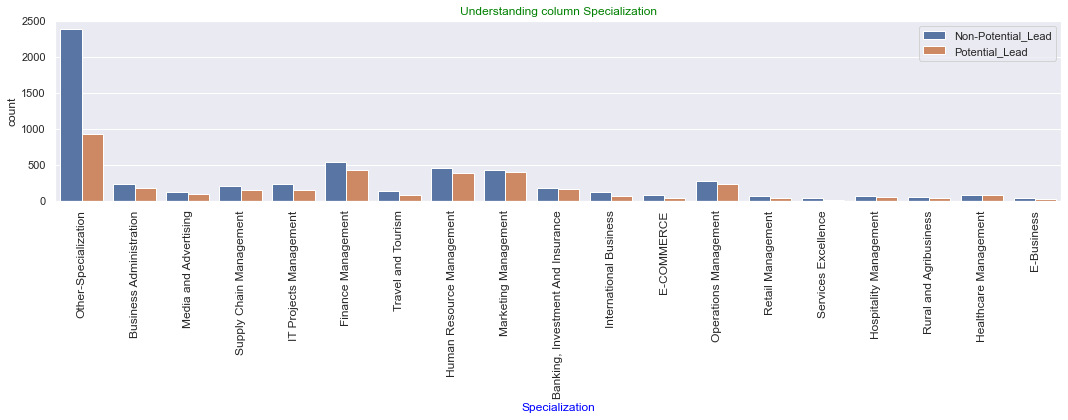

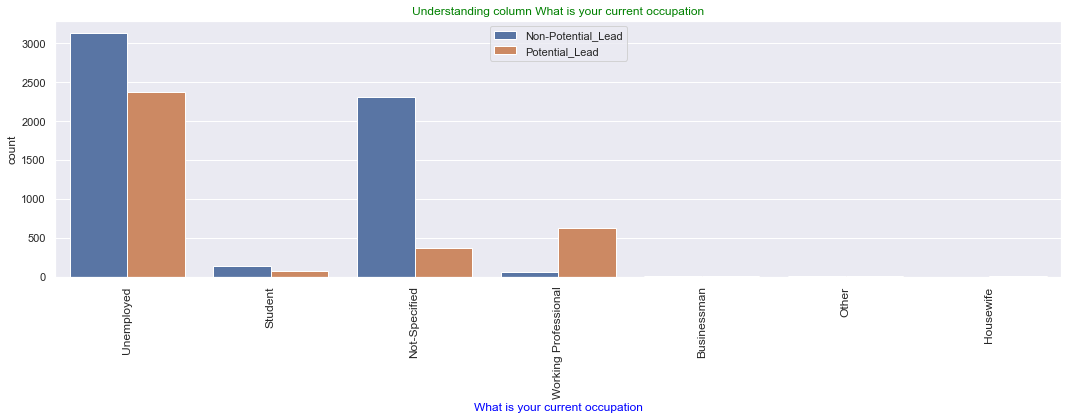

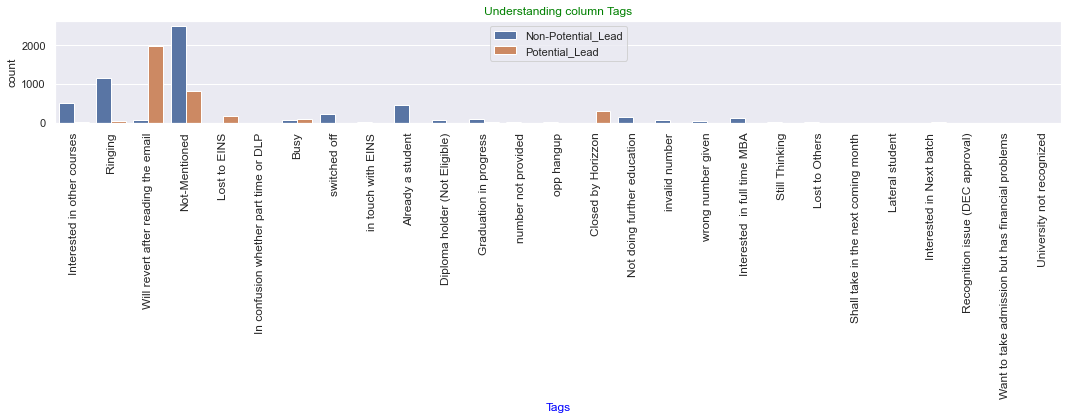

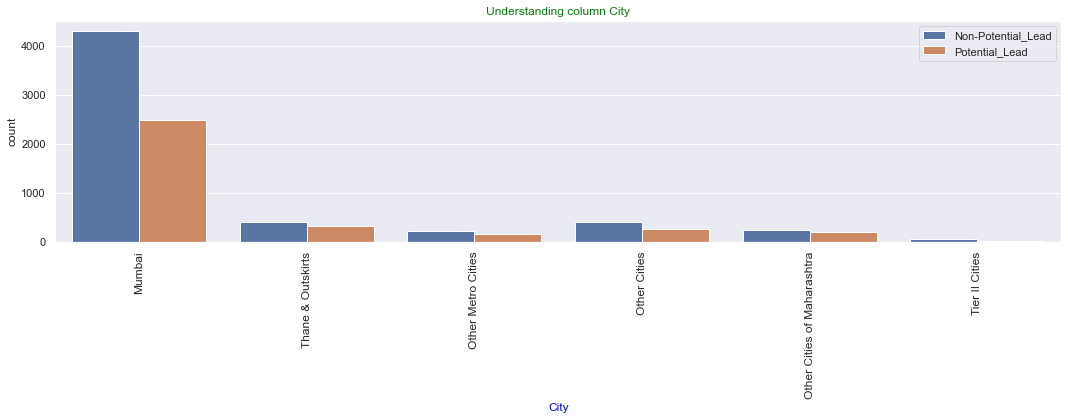

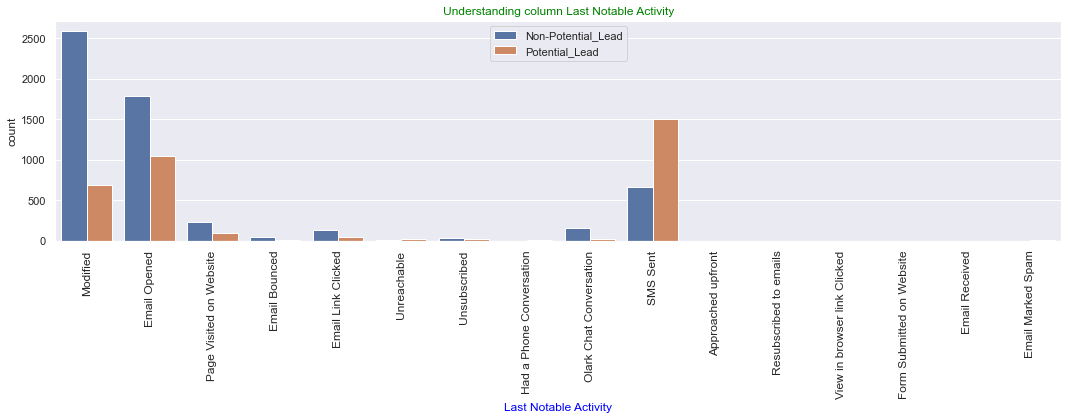

In [52]:
#Plotting count plot to check the data distribution.
mul_colmn = ['Lead Origin', 'Lead Source', 'Last Activity','Specialization', 
             'What is your current occupation', 'Tags', 'City','Last Notable Activity']

for col in mul_colmn:
    plt.figure(figsize=[15,6])
    ax = sns.countplot(x=col, hue='Converted',data=leadcopy_df,orient='h' )
    plt.title("Understanding column {}".format(col),color='green',fontsize =12)
    plt.xticks(rotation =90,fontsize =12)
    plt.xlabel(col,color='blue',fontsize =12)
    plt.tight_layout()
    plt.legend(('Non-Potential_Lead','Potential_Lead'))
    plt.show();

#### Key-Observation :
1. Important characteristics of potential leads, 
  - if lead origin is from ADD form there are more chance of conversion.
  - if lead source is from reference and Welingak Website there are more chance of conversion.
  - if Last activity was SMS sent than there is more chance of conversion.
  - No significant indicators from specialization and city of applicants
  - Working professionals are more interested in courses.
  - if tags was reverting after reading mail than there is more chance of conversion.


2. Dropping 'Last Notable Activity' ,since it only corresponds to activities performed by the student.

3. Dropping 'Last Activity',and 'Tags',columns, since this are sales team generated data after contacting the lead. The aim is to find the potential leads so sales team can contact them.

4. Less significant contributing classes in lead source,Specialization,and current occupation, can be classified into other category group.



In [53]:
# Dropping column 'Last Notable Activity''Last Activity',and 'Tags'.
leadcopy_df.drop(columns = ['Last Notable Activity','Last Activity','Tags'],inplace=True)

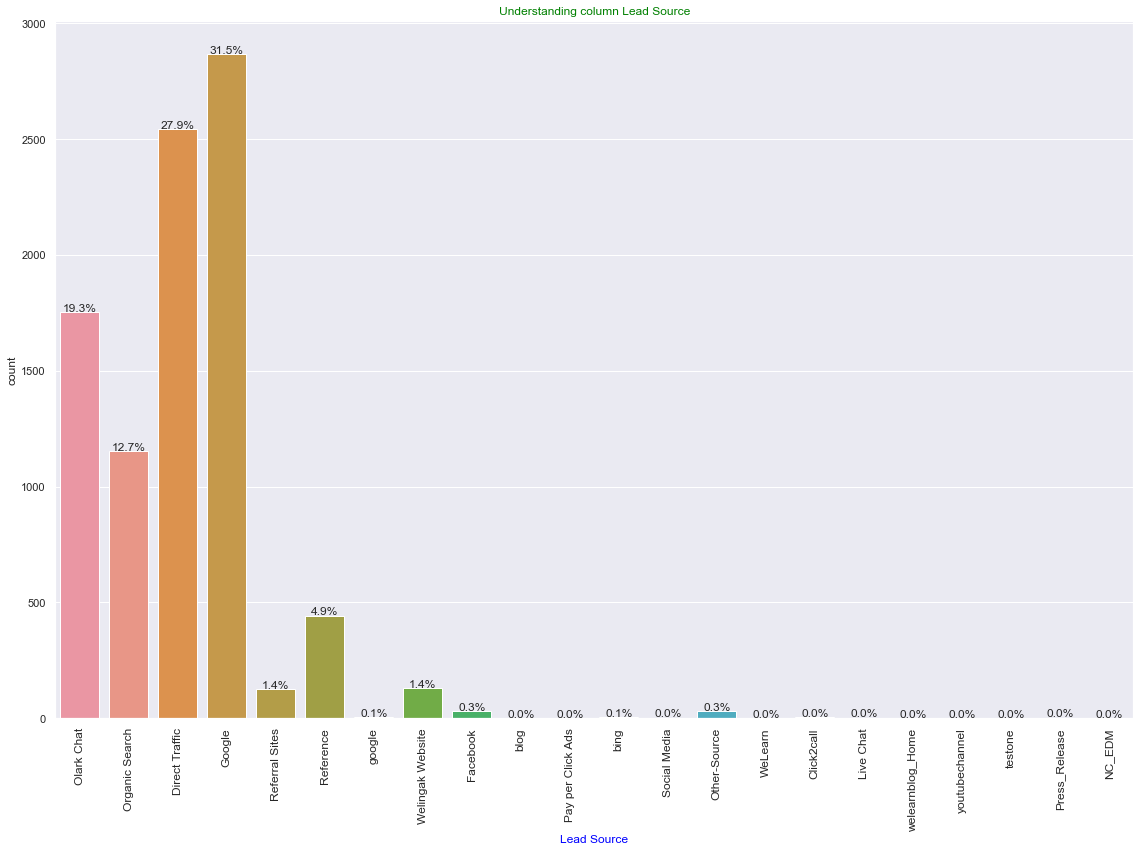

In [54]:
#Checking lead source percentage data distibution.
Count_plot(leadcopy_df,'Lead Source')

- Combing Google and google together , combing classes with less than 1% contribution to other sources.

In [55]:
# Combing Google and google together.
leadcopy_df['Lead Source'] = leadcopy_df['Lead Source'].replace(['google'] ,'Google') 

In [56]:
# Getting data with less than 1% classes
lead_dt = leadcopy_df['Lead Source'].value_counts()/len(leadcopy_df)*100
lead_dt = lead_dt[lead_dt < 1.]
lead_dt.index

Index(['Facebook', 'Other-Source', 'bing', 'Click2call', 'Press_Release',
       'Social Media', 'Live Chat', 'testone', 'Pay per Click Ads',
       'youtubechannel', 'WeLearn', 'welearnblog_Home', 'NC_EDM', 'blog'],
      dtype='object')

In [57]:
#Replacing data with 'Other-Source'.
leadcopy_df['Lead Source'] = leadcopy_df['Lead Source'].replace(lead_dt.index ,'Other-Source') 

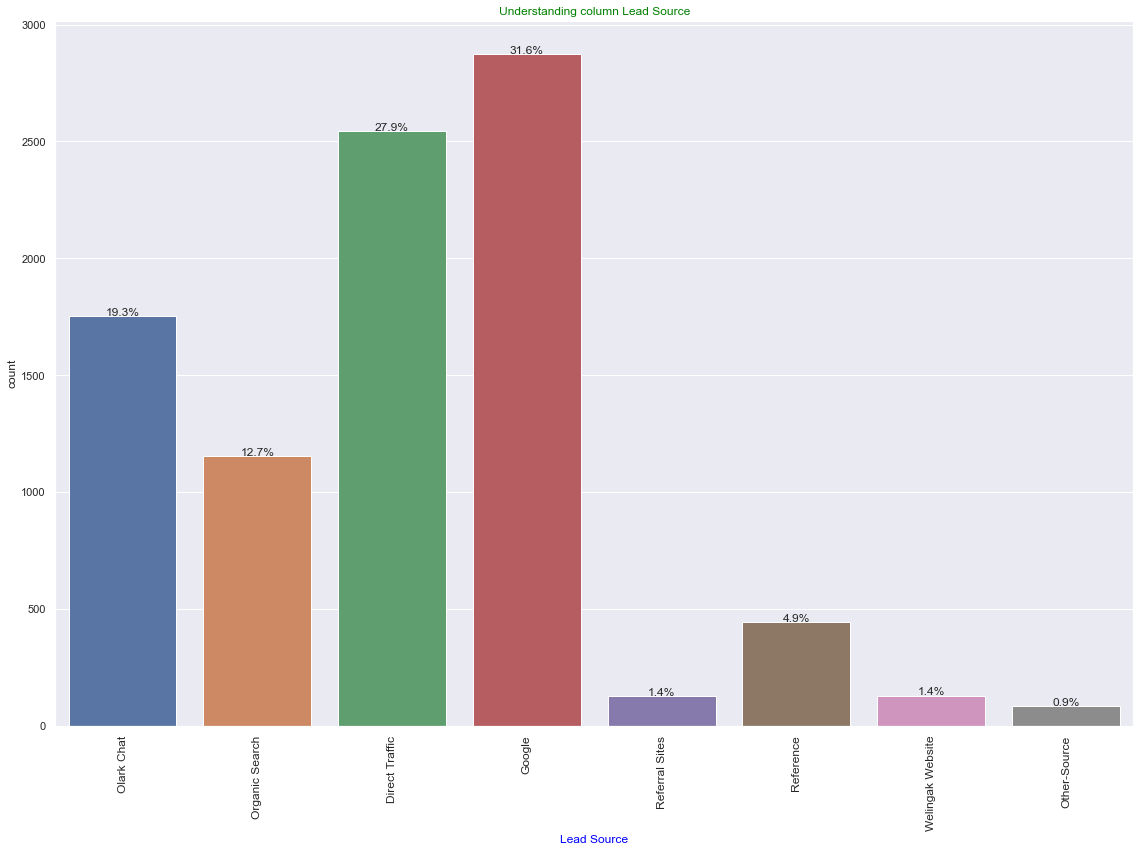

In [58]:
#Checking lead source percentage data distibution.
Count_plot(leadcopy_df,'Lead Source')

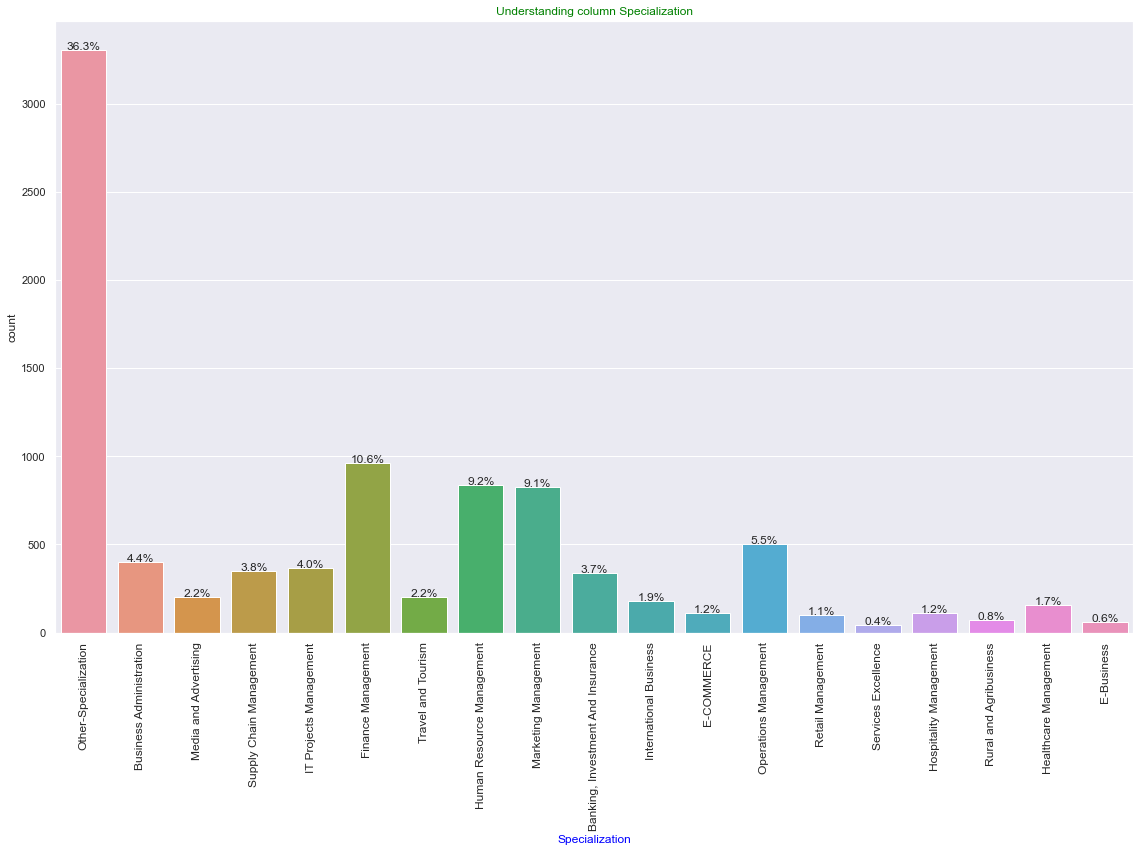

In [59]:
#Checking Specialization percentage data distibution.
Count_plot(leadcopy_df,'Specialization')

- Combing classes with less than equal to 1% contibution to other-specialization.

In [60]:
# Getting data with less than 1% classes.
Spec_dt = leadcopy_df['Specialization'].value_counts()/len(leadcopy_df)*100
Spec_dt = Spec_dt[Spec_dt <= 1.]
Spec_dt.index

Index(['Rural and Agribusiness', 'E-Business', 'Services Excellence'], dtype='object')

In [61]:
#Replacing data with 'Other-Specialization'.
leadcopy_df['Specialization'] = leadcopy_df['Specialization'].replace(Spec_dt.index ,'Other-Specialization')

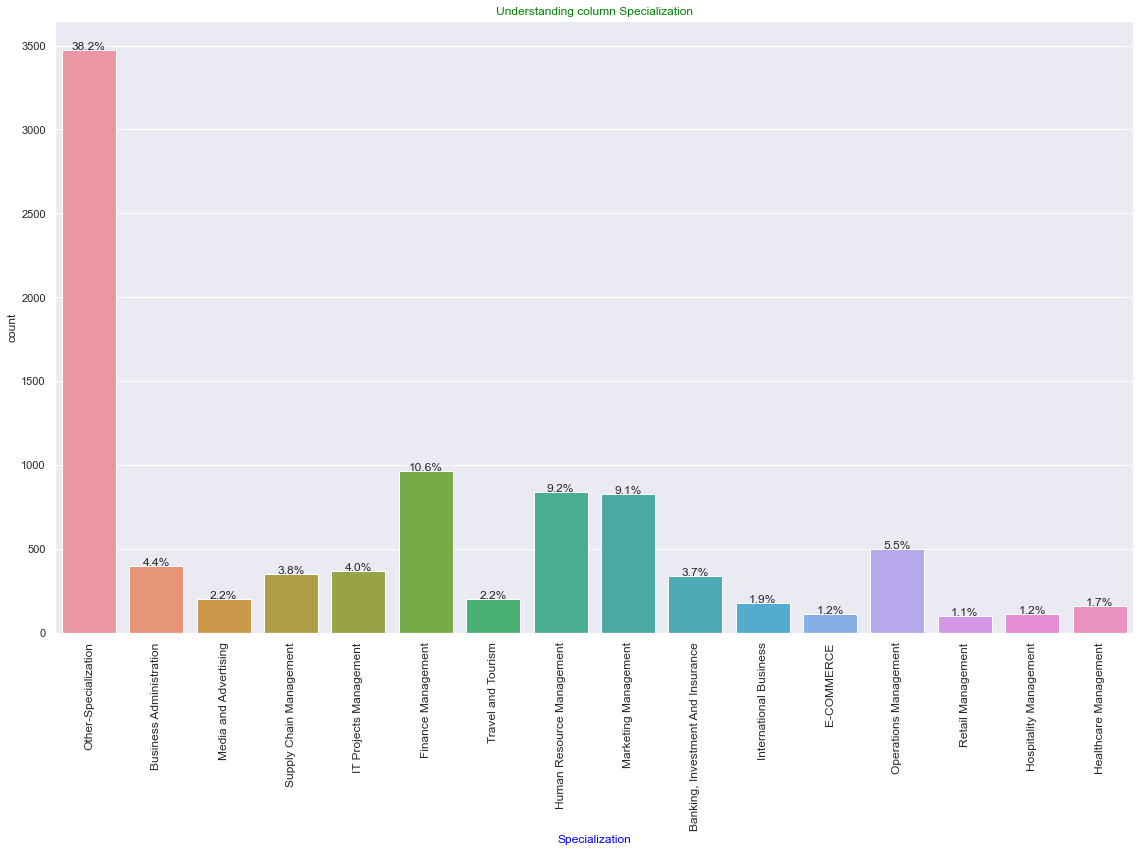

In [62]:
#Checking Specialization percentage data distibution.
Count_plot(leadcopy_df,'Specialization')

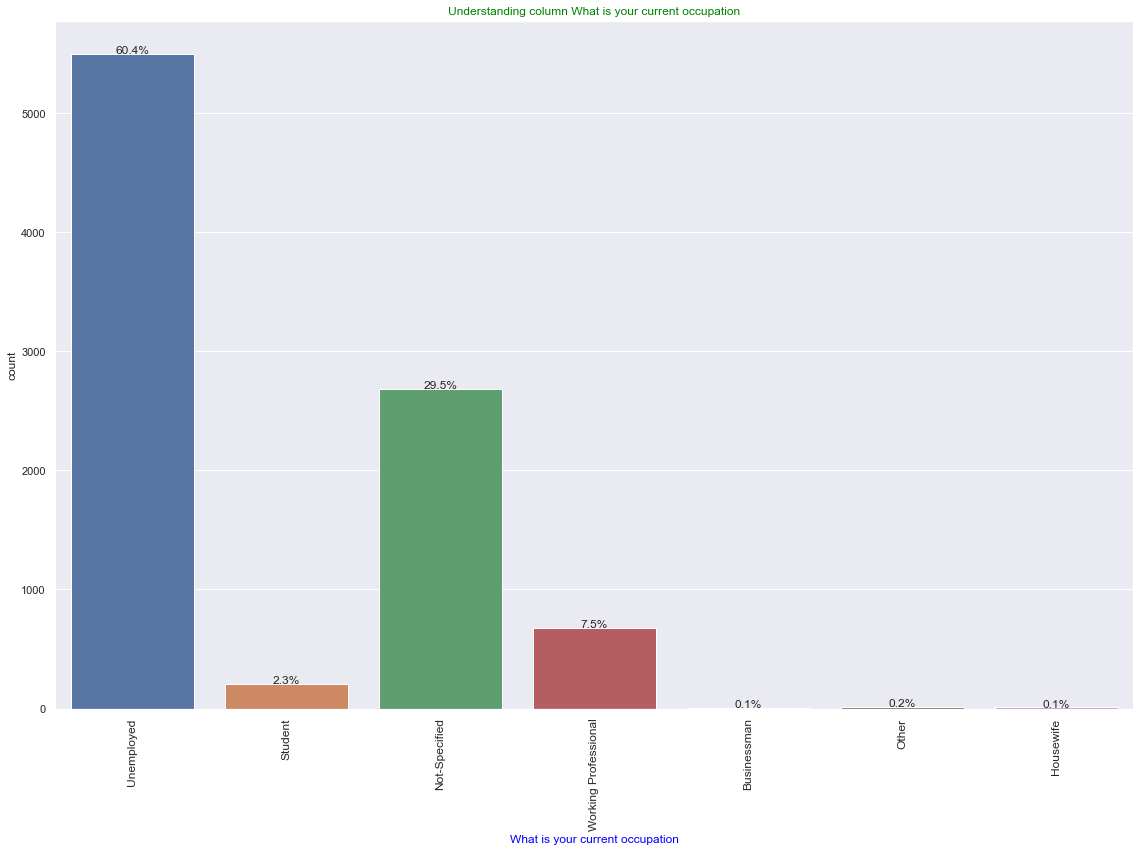

In [63]:
#Checking 'What is your current occupation' percentage data distibution.
Count_plot(leadcopy_df,'What is your current occupation')

- Combing classes with less than equal to 1% contibution to other-occupation.

In [64]:
# Getting data with less than 1% classes.
occu_dt = leadcopy_df['What is your current occupation'].value_counts()/len(leadcopy_df)*100
occu_dt = occu_dt[occu_dt <= 1.]
occu_dt.index

Index(['Other', 'Housewife', 'Businessman'], dtype='object')

In [65]:
#Replacing data with 'Other-Occupation'.
leadcopy_df['What is your current occupation'] = leadcopy_df['What is your current occupation'].replace(occu_dt.index ,'Other-Occupation')

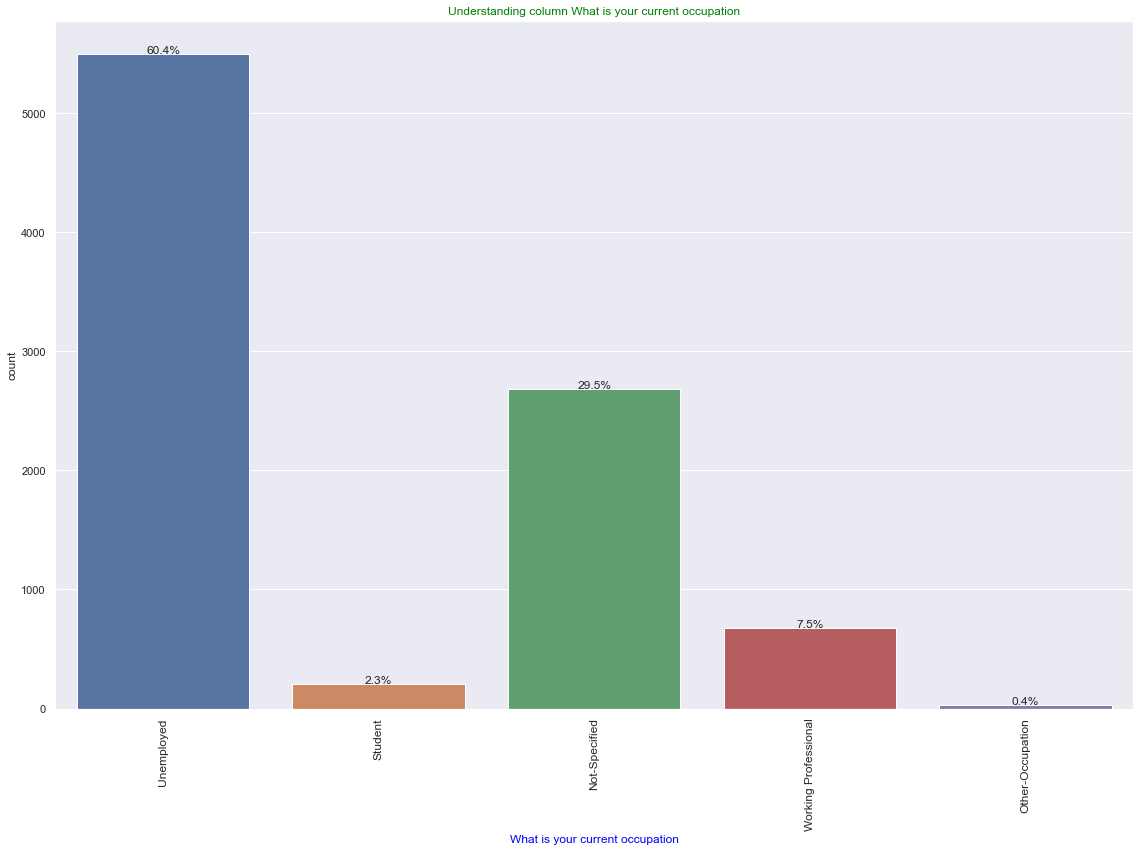

In [66]:
#Checking 'What is your current occupation' percentage data distibution.
Count_plot(leadcopy_df,'What is your current occupation')

#### 3.3. Bivariate Analysis.

##### 3.3.1 Numerical Data - correlation matrix and pair plot.

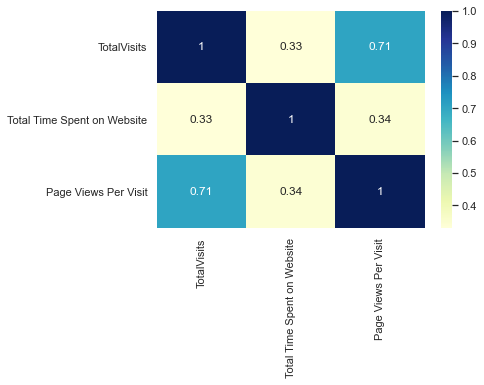

In [67]:
# Let's see the correlation matrix of numerical data. 
sns.heatmap(leadcopy_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']].corr(),
            cmap="YlGnBu",annot = True)
plt.show()



<Figure size 576x432 with 0 Axes>

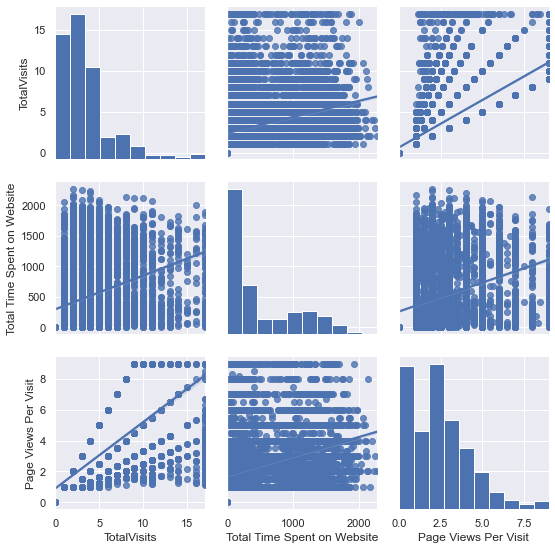

In [68]:
#Pair plot of numerical data.
plt.figure(figsize=[8,6])
sns.pairplot(leadcopy_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
             ,kind='reg')

plt.show()

- 'Total Visit' and 'Page views per visit' show higher correlation.


Droping 'Prospect ID' and 'Lead Number' from the analysis, since it is represetative of unique customer acquisition that is not required for model building.

In [69]:
#Dropping 'Prospect ID' and 'Lead Number'.
leadcopy_df.drop(columns =[ 'Prospect ID','Lead Number'],inplace=True)

In [70]:
#Checking the final distribution.
leadcopy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 11 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Lead Origin                             9103 non-null   object 
 1   Lead Source                             9103 non-null   object 
 2   Do Not Email                            9103 non-null   int64  
 3   Converted                               9103 non-null   int64  
 4   TotalVisits                             9103 non-null   float64
 5   Total Time Spent on Website             9103 non-null   int64  
 6   Page Views Per Visit                    9103 non-null   float64
 7   Specialization                          9103 non-null   object 
 8   What is your current occupation         9103 non-null   object 
 9   City                                    9103 non-null   object 
 10  A free copy of Mastering The Interview  9103 non-null   int6

### 4. Dummy variable creation.

#### 4.1. For categorical variables with multiple levels, create dummy features (one-hot encoded).

In [71]:
#Dummy variable creation for multi-class category.
mul_colmn = ['Lead Origin', 'Lead Source','Specialization', 'What is your current occupation', 'City']

# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leadcopy_df[mul_colmn], drop_first=True)

# Adding the results to the master dataframe
leadcopy_df = pd.concat([leadcopy_df, dummy1], axis=1)

In [72]:
#Dropping duplicate values.
leadcopy_df.drop(columns =mul_colmn,inplace=True)

In [73]:
#Understanding the columns.
leadcopy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9103 entries, 0 to 9239
Data columns (total 40 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Do Not Email                                          9103 non-null   int64  
 1   Converted                                             9103 non-null   int64  
 2   TotalVisits                                           9103 non-null   float64
 3   Total Time Spent on Website                           9103 non-null   int64  
 4   Page Views Per Visit                                  9103 non-null   float64
 5   A free copy of Mastering The Interview                9103 non-null   int64  
 6   Lead Origin_Landing Page Submission                   9103 non-null   uint8  
 7   Lead Origin_Lead Add Form                             9103 non-null   uint8  
 8   Lead Origin_Lead Import                               9103

In [74]:
# Creating a deep copy of leadcopy_df, for Final Target Score Evaluation on a complete data frame.
leadcopy_TargetScoreEval_df = leadcopy_df.copy(deep=True)

### 4. Test-Train Split.

In [75]:
#Importing sklearn libraries.
from sklearn.model_selection import train_test_split

In [76]:
# Putting feature variable X.
X = leadcopy_df.drop(['Converted'], axis=1)
X.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Travel and Tourism,What is your current occupation_Other-Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
0,0,0.0,0,0.0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,2.0,1532,2.0,1,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,1.0,305,1.0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,2.0,1428,1.0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [77]:
# Putting target variable to y.
y = leadcopy_df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [78]:
# Splitting the data into train and test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5. Feature Scaling.

In [79]:
#Importing sklearn StandardScaler.
from sklearn.preprocessing import StandardScaler

In [80]:
#Scaling features, 'TotalVisits','Total Time Spent on Website','Page Views Per Visit'.
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Google,Lead Source_Olark Chat,...,Specialization_Travel and Tourism,What is your current occupation_Other-Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities
7962,0,-0.105932,1.476324,-0.420056,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5520,0,1.113025,-0.771066,2.354047,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1962,0,0.503547,-0.571257,0.084327,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
1566,0,3.246199,1.393834,0.588709,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
9170,0,-1.020149,-0.881052,-1.176630,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0


In [81]:
### Checking the data imbalance in coverted target variable.
round(np.mean(leadcopy_df['Converted'])*100,2)

38.02

38% of data showing converted customers, and thus it has better data balance. 

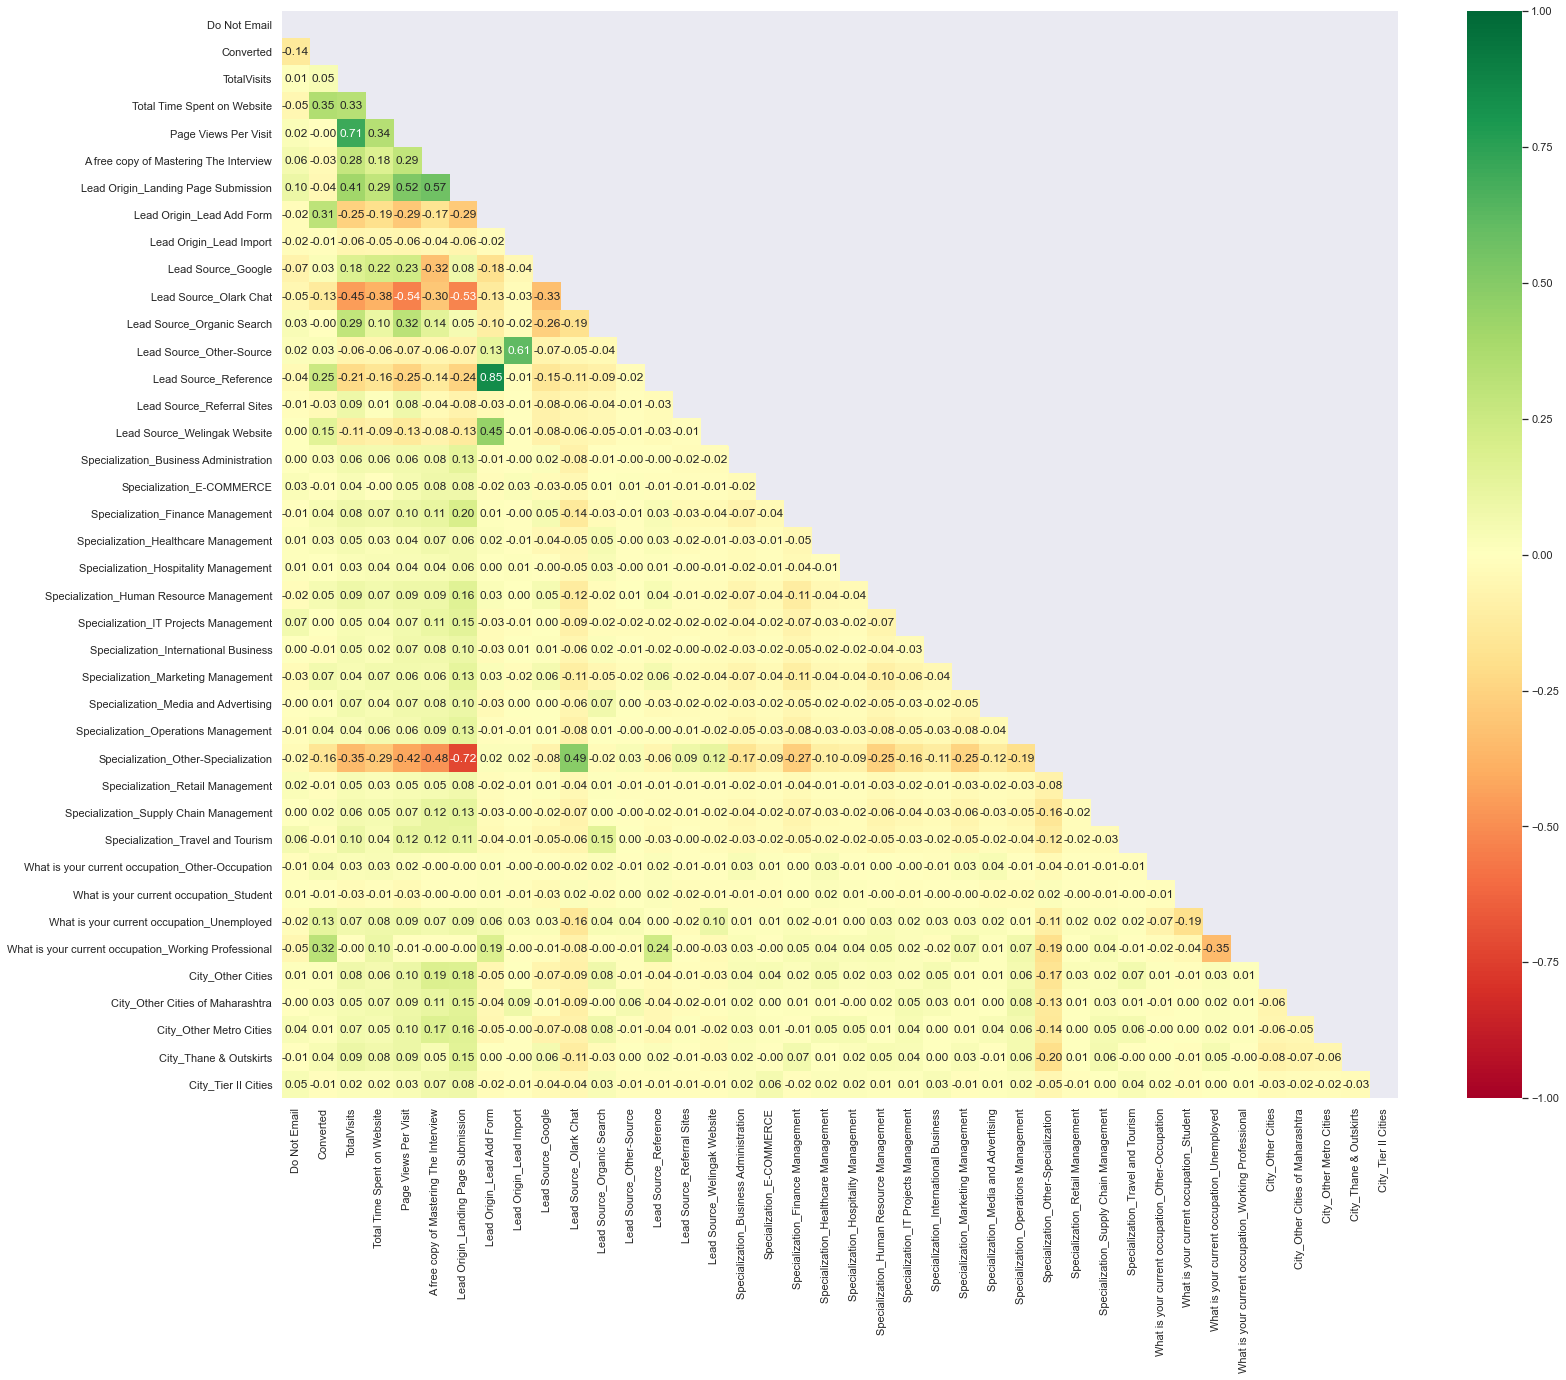

In [82]:
# Checking correlation matrix. 
corr_Diff = leadcopy_df.corr()
mask =np.zeros_like(corr_Diff)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=[25,20])
sns.heatmap(corr_Diff,mask=mask,annot=True,fmt='1.2f',cmap="RdYlGn",vmax=1,vmin=-1)
plt.show()

#### Dropping highly correlated dummy variables :
- Dropping columns that have a correlation value higher than 0.6.
- Dropping columns 'Page Views Per Visit','Lead Source_Reference','Lead Source_Other-Source',and 'Specialization_Other-Specialization', because of high correlation.

In [83]:
#Dropping columns.
X_train = X_train.drop(['Page Views Per Visit','Lead Source_Reference','Lead Source_Other-Source',
                      'Specialization_Other-Specialization'],axis= 1)

### 6. Model Building.

#### 6.1 Selecting top 15 features Using RFE

In [84]:
#Importing LogisticRegression.
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [85]:
# Running RFE with 15 variables as output.
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)            
rfe = rfe.fit(X_train, y_train)

In [86]:
#Checking rank of variables.
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', False, 15),
 ('Total Time Spent on Website', True, 1),
 ('A free copy of Mastering The Interview', False, 18),
 ('Lead Origin_Landing Page Submission', False, 5),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Google', False, 16),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 20),
 ('Lead Source_Referral Sites', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Specialization_Business Administration', False, 4),
 ('Specialization_E-COMMERCE', False, 14),
 ('Specialization_Finance Management', False, 3),
 ('Specialization_Healthcare Management', False, 6),
 ('Specialization_Hospitality Management', True, 1),
 ('Specialization_Human Resource Management', False, 8),
 ('Specialization_IT Projects Management', True, 1),
 ('Specialization_International Business', False, 10),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertisin

In [87]:
#Important indicator variables.
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Origin_Lead Import',
       'Lead Source_Olark Chat', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Specialization_Hospitality Management',
       'Specialization_IT Projects Management',
       'Specialization_Marketing Management',
       'What is your current occupation_Other-Occupation',
       'What is your current occupation_Student',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'City_Tier II Cities'],
      dtype='object')

In [88]:
#Lesser important variables.
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'A free copy of Mastering The Interview',
       'Lead Origin_Landing Page Submission', 'Lead Source_Google',
       'Lead Source_Organic Search', 'Specialization_Business Administration',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Human Resource Management',
       'Specialization_International Business',
       'Specialization_Media and Advertising',
       'Specialization_Operations Management',
       'Specialization_Retail Management',
       'Specialization_Supply Chain Management',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts'],
      dtype='object')

#### 6.2. Assessing the model with StatsModels

In [89]:
#Importing statsmodels .
import statsmodels.api as sm

##### 6.2.3 Model-1 

In [90]:
#Running the logistic regression model.
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6356
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2865.9
Date:                Sun, 11 Apr 2021   Deviance:                       5731.7
Time:                        18:18:07   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0463      0.082    -25.047      0.000      -2.206      -1.886
Do Not Email                                            -1.3487      0.158     -8.524      0.000      -1.659      -1.039
Total Time Spent on Website                              1.1073      0.039     28.675      0.000       1.032       1.183
Lead Origin_Lead Add Form                                3.8254      0.221     17.327      0.000       3.393       4.258
Lead Origin_Lead Import                                  0.9905      0.442      2.241      0.025       0.124       1.857
Lead Source_Olark Chat                                   0.9295      0.097      9.605      0.000       0.740       1.119
Lead Source_Referral Sites                              -0.4652      0.329     -1.414      0.157      -1.110       0.180
Lead Source_Welingak Website                             1.9940      0.750      2.660      0.008       0.525       3.463
Specialization_Hospitality Management                   -0.6400      0.304     -2.103      0.035      -1.237      -0.043
Specialization_IT Projects Management                    0.1290      0.172      0.749      0.454      -0.208       0.467
Specialization_Marketing Management                      0.1808      0.113      1.602      0.109      -0.040       0.402
What is your current occupation_Other-Occupation         1.9255      0.477      4.034      0.000       0.990       2.861
What is your current occupation_Student                  1.1536      0.224      5.152      0.000       0.715       1.592
What is your current occupation_Unemployed               1.3002      0.084     15.539      0.000       1.136       1.464
What is your current occupation_Working Professional     3.7949      0.190     19.965      0.000       3.422       4.167
City_Tier II Cities                                     -0.4465      0.404     -1.105      0.269      -1.239       0.346
========================================================================================================================
"""

In [91]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [92]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
12,What is your current occupation_Unemployed,1.41
6,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.30
1,Total Time Spent on Website,1.29
13,What is your current occupation_Working Profes...,1.17
9,Specialization_Marketing Management,1.12
0,Do Not Email,1.07
8,Specialization_IT Projects Management,1.05
7,Specialization_Hospitality Management,1.02


##### Procedure Followed for feature elimination .
1. Prio 1 : Removing Features with high p value and high VIF first. (P-value >0.05 ,VIF >5).
2. Prio 2 : Removing Features with high p value and low VIF. (P-value >0.05 ,VIF <= 5).
3. Prio 3 : Removing Features with low p value and high VIF. (P-value <=0.05 ,VIF > 5).
4. Prio 4 : Retaining Features with low p value and low VIF. (P-value <=0.05 , VIF <= 5).


Dropping 'Specialization_IT Projects Management' which has higher P-value (P-value > 0.05)

In [93]:
#Dropping 'Specialization_IT Projects Management' from existing list.
col = col.drop('Specialization_IT Projects Management', 1)

##### 6.2.4 Model-2

In [94]:
#Re-running the logistic regression model.
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6357
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.1
Date:                Sun, 11 Apr 2021   Deviance:                       5732.3
Time:                        18:18:07   Pearson chi2:                 6.38e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0405      0.081    -25.097      0.000      -2.200      -1.881
Do Not Email                                            -1.3454      0.158     -8.500      0.000      -1.656      -1.035
Total Time Spent on Website                              1.1073      0.039     28.679      0.000       1.032       1.183
Lead Origin_Lead Add Form                                3.8197      0.221     17.314      0.000       3.387       4.252
Lead Origin_Lead Import                                  0.9835      0.442      2.226      0.026       0.117       1.850
Lead Source_Olark Chat                                   0.9236      0.096      9.579      0.000       0.735       1.113
Lead Source_Referral Sites                              -0.4695      0.329     -1.427      0.154      -1.114       0.175
Lead Source_Welingak Website                             1.9916      0.750      2.657      0.008       0.522       3.461
Specialization_Hospitality Management                   -0.6466      0.304     -2.126      0.034      -1.243      -0.050
Specialization_Marketing Management                      0.1743      0.113      1.549      0.121      -0.046       0.395
What is your current occupation_Other-Occupation         1.9291      0.478      4.039      0.000       0.993       2.865
What is your current occupation_Student                  1.1522      0.224      5.145      0.000       0.713       1.591
What is your current occupation_Unemployed               1.3017      0.084     15.561      0.000       1.138       1.466
What is your current occupation_Working Professional     3.7970      0.190     19.987      0.000       3.425       4.169
City_Tier II Cities                                     -0.4459      0.405     -1.101      0.271      -1.239       0.348
========================================================================================================================
"""

In [95]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
11,What is your current occupation_Unemployed,1.37
6,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.30
1,Total Time Spent on Website,1.29
12,What is your current occupation_Working Profes...,1.16
8,Specialization_Marketing Management,1.11
0,Do Not Email,1.06
7,Specialization_Hospitality Management,1.02
10,What is your current occupation_Student,1.02


- Dropping 'City_Tier II Cities' which has higher P value (P-value > 0.05)

In [96]:
#Dropping 'City_Tier II Cities' from existing list.
col = col.drop('City_Tier II Cities', 1)

##### 6.2.5 Model-3

In [97]:
#Re-running the logistic regression model.
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6358
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2866.8
Date:                Sun, 11 Apr 2021   Deviance:                       5733.6
Time:                        18:18:07   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0444      0.081    -25.162      0.000      -2.204      -1.885
Do Not Email                                            -1.3511      0.158     -8.547      0.000      -1.661      -1.041
Total Time Spent on Website                              1.1074      0.039     28.688      0.000       1.032       1.183
Lead Origin_Lead Add Form                                3.8239      0.221     17.334      0.000       3.392       4.256
Lead Origin_Lead Import                                  0.9876      0.442      2.235      0.025       0.122       1.854
Lead Source_Olark Chat                                   0.9276      0.096      9.627      0.000       0.739       1.116
Lead Source_Referral Sites                              -0.4655      0.329     -1.415      0.157      -1.110       0.179
Lead Source_Welingak Website                             1.9931      0.750      2.659      0.008       0.524       3.462
Specialization_Hospitality Management                   -0.6469      0.305     -2.123      0.034      -1.244      -0.050
Specialization_Marketing Management                      0.1748      0.112      1.555      0.120      -0.046       0.395
What is your current occupation_Other-Occupation         1.9325      0.478      4.046      0.000       0.996       2.869
What is your current occupation_Student                  1.1550      0.224      5.158      0.000       0.716       1.594
What is your current occupation_Unemployed               1.3016      0.084     15.562      0.000       1.138       1.466
What is your current occupation_Working Professional     3.7943      0.190     19.976      0.000       3.422       4.167
========================================================================================================================
"""

In [98]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
11,What is your current occupation_Unemployed,1.37
6,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.30
1,Total Time Spent on Website,1.29
12,What is your current occupation_Working Profes...,1.16
8,Specialization_Marketing Management,1.11
0,Do Not Email,1.06
7,Specialization_Hospitality Management,1.02
10,What is your current occupation_Student,1.02


- Dropping 'Lead Source_Referral Sites' which has higher P value (P-value > 0.05)

In [99]:
#Dropping 'Lead Source_Referral Sites' from existing list.
col = col.drop('Lead Source_Referral Sites', 1)

##### 6.2.6 Model-4

In [100]:
#Re-running the logistic regression model.
X_train_sm = sm.add_constant(X_train[col])
logm5 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm5.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6359
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2867.8
Date:                Sun, 11 Apr 2021   Deviance:                       5735.7
Time:                        18:18:07   Pearson chi2:                 6.39e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0543      0.081    -25.364      0.000      -2.213      -1.896
Do Not Email                                            -1.3479      0.158     -8.528      0.000      -1.658      -1.038
Total Time Spent on Website                              1.1085      0.039     28.717      0.000       1.033       1.184
Lead Origin_Lead Add Form                                3.8312      0.221     17.370      0.000       3.399       4.263
Lead Origin_Lead Import                                  0.9962      0.442      2.255      0.024       0.130       1.862
Lead Source_Olark Chat                                   0.9365      0.096      9.733      0.000       0.748       1.125
Lead Source_Welingak Website                             1.9936      0.750      2.659      0.008       0.524       3.463
Specialization_Hospitality Management                   -0.6409      0.305     -2.103      0.036      -1.238      -0.043
Specialization_Marketing Management                      0.1794      0.112      1.595      0.111      -0.041       0.400
What is your current occupation_Other-Occupation         1.9397      0.478      4.061      0.000       1.003       2.876
What is your current occupation_Student                  1.1616      0.224      5.188      0.000       0.723       1.600
What is your current occupation_Unemployed               1.3038      0.084     15.594      0.000       1.140       1.468
What is your current occupation_Working Professional     3.7988      0.190     19.994      0.000       3.426       4.171
========================================================================================================================
"""

In [101]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
10,What is your current occupation_Unemployed,1.36
5,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.30
1,Total Time Spent on Website,1.29
11,What is your current occupation_Working Profes...,1.16
7,Specialization_Marketing Management,1.11
0,Do Not Email,1.06
6,Specialization_Hospitality Management,1.02
9,What is your current occupation_Student,1.02


- Dropping 'Specialization_Marketing Management' which has higher P value (P-value > 0.05)

In [102]:
#Dropping 'Specialization_Marketing Management' from existing list.
col = col.drop('Specialization_Marketing Management', 1)

##### 6.2.7 Model-5

In [103]:
#Re-running the logistic regression model.
X_train_sm = sm.add_constant(X_train[col])
logm6 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm6.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6372
Model:                            GLM   Df Residuals:                     6360
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2869.1
Date:                Sun, 11 Apr 2021   Deviance:                       5738.2
Time:                        18:18:07   Pearson chi2:                 6.36e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -2.0389      0.080    -25.368      0.000      -2.196      -1.881
Do Not Email                                            -1.3529      0.158     -8.560      0.000      -1.663      -1.043
Total Time Spent on Website                              1.1102      0.039     28.766      0.000       1.035       1.186
Lead Origin_Lead Add Form                                3.8364      0.220     17.405      0.000       3.404       4.268
Lead Origin_Lead Import                                  0.9781      0.442      2.214      0.027       0.112       1.844
Lead Source_Olark Chat                                   0.9262      0.096      9.658      0.000       0.738       1.114
Lead Source_Welingak Website                             1.9715      0.750      2.630      0.009       0.502       3.441
Specialization_Hospitality Management                   -0.6626      0.305     -2.174      0.030      -1.260      -0.065
What is your current occupation_Other-Occupation         1.9699      0.476      4.135      0.000       1.036       2.904
What is your current occupation_Student                  1.1653      0.224      5.200      0.000       0.726       1.605
What is your current occupation_Unemployed               1.3083      0.084     15.654      0.000       1.144       1.472
What is your current occupation_Working Professional     3.8124      0.190     20.090      0.000       3.440       4.184
========================================================================================================================
"""

In [104]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs.
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,1.57
5,Lead Source_Welingak Website,1.32
4,Lead Source_Olark Chat,1.30
1,Total Time Spent on Website,1.29
9,What is your current occupation_Unemployed,1.29
10,What is your current occupation_Working Profes...,1.13
0,Do Not Email,1.06
6,Specialization_Hospitality Management,1.02
3,Lead Origin_Lead Import,1.01
8,What is your current occupation_Student,1.01


- All variables have VIF value < 3 and p-value <0.05 .So we need not drop any variables and we can make predictions using this model.

In [105]:
# Getting the predicted values on the train set.
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

7962    0.712664
5520    0.169852
1962    0.203454
1566    0.965140
9170    0.313757
5097    0.109988
8954    0.284714
309     0.236214
5519    0.109988
1050    0.624206
dtype: float64

In [106]:
# Reshaping the train set.
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.71266351, 0.16985245, 0.20345354, 0.96514028, 0.3137571 ,
       0.10998773, 0.28471413, 0.23621414, 0.10998773, 0.62420647])

##### Creating a dataframe with the actual converted flag and  predicted probabilities.

In [107]:
#Converting the train set to dataframe.
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
#Assigning Score to train data.
y_train_pred_final['Lead_Score'] = round(y_train_pred_final['Converted_Prob'] *100,2)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead_Score
0,0,0.712664,7962,71.27
1,0,0.169852,5520,16.99
2,0,0.203454,1962,20.35
3,1,0.965140,1566,96.51
4,0,0.313757,9170,31.38


### 7. Plotting the ROC Curve

In [108]:
#Importing Metrics.
from sklearn import metrics

#Defining a function to plot ROC curve.
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

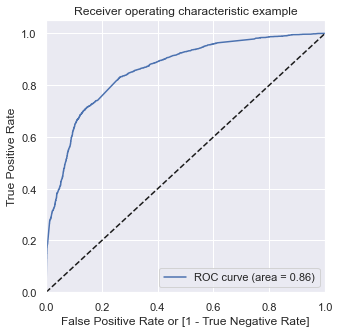

In [109]:
#Plotting ROC curve.
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)

- Since ROC curve follows the left-hand border and then the top border of the ROC space, the predicted values are accurate for given train sample.
- Area under ROC curve is 0.86 indicating better prediction model.

### 8. Finding Optimal Cutoff Point 

#### 8.1. Probabality that balances sensitivity and specificity.

In [110]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.712664,7962,71.27,1,1,1,1,1,1,1,1,0,0
1,0,0.169852,5520,16.99,1,1,0,0,0,0,0,0,0,0
2,0,0.203454,1962,20.35,1,1,1,0,0,0,0,0,0,0
3,1,0.965140,1566,96.51,1,1,1,1,1,1,1,1,1,1
4,0,0.313757,9170,31.38,1,1,1,1,0,0,0,0,0,0


In [111]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

# Accuracy = (TP+TN)/(TP+TN+FP+FN).
# Sensitivity = (TP)/(TP+FN). 
# Specificity = (TN)/(TN+FP). 

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.379630  1.000000  0.000000
0.1   0.1  0.520716  0.981811  0.238553
0.2   0.2  0.691777  0.907400  0.559828
0.3   0.3  0.772285  0.828442  0.737921
0.4   0.4  0.803515  0.698636  0.867695
0.5   0.5  0.800691  0.642828  0.897293
0.6   0.6  0.781544  0.562216  0.915760
0.7   0.7  0.759730  0.470029  0.937010
0.8   0.8  0.733051  0.351385  0.966608
0.9   0.9  0.688638  0.188921  0.994435


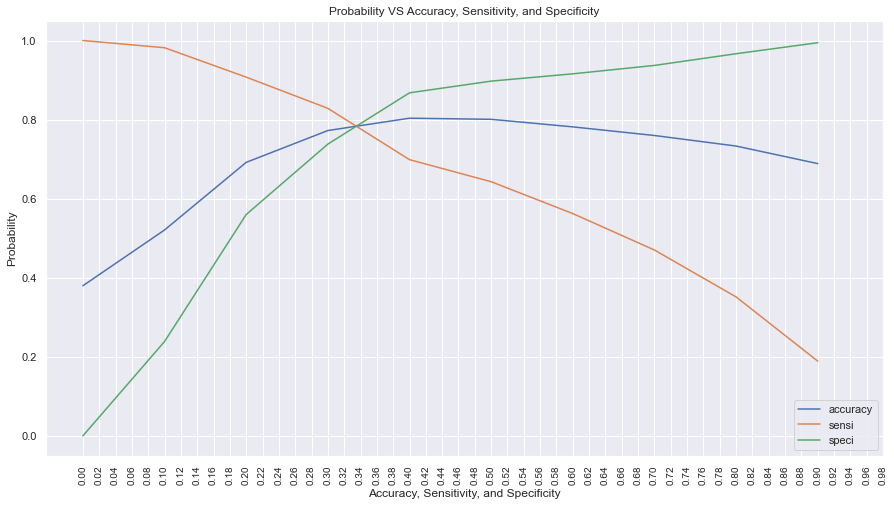

In [112]:
# Plotting accuracy, sensitivity, and specificity for various probabilities.

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize=(15,8))
plt.xticks(np.arange(0,1,step=.02), size=10,rotation =90)
plt.xlabel('Accuracy, Sensitivity, and Specificity')
plt.ylabel('Probability')
plt.title('Probability VS Accuracy, Sensitivity, and Specificity')
plt.show()

- Choosing 0.3 as cut-off to make Sensitivity > 80% .At 0.3 cutoff there is optimal tradeoff between Accuracy,Sensitivity, and Specificity. 

In [113]:
# Predicting the model at 0.3 cut-off.
y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_Prob.map( lambda x: 1 if x > 0.3 else 0)
y_train_pred_final.head()

,Converted,Converted_Prob,Prospect ID,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.712664,7962,71.27,1,1,1,1,1,1,1,1,0,0,1
1,0,0.169852,5520,16.99,1,1,0,0,0,0,0,0,0,0,0
2,0,0.203454,1962,20.35,1,1,1,0,0,0,0,0,0,0,0
3,1,0.965140,1566,96.51,1,1,1,1,1,1,1,1,1,1,1
4,0,0.313757,9170,31.38,1,1,1,1,0,0,0,0,0,0,1


In [114]:
# Function to Indicate accuracy,Sensitivity,Specificity,True-Positive rate,False-Positive rate of the model.
def Mod_evaluation(actual,predicted):
    # Checking the overall accuracy of the model.
    acc = metrics.accuracy_score(actual, predicted)
    print("Accuracy of model is ", round(acc,4))
    # Checking the confusion matrix of the model.
    conf = metrics.confusion_matrix(actual, predicted)
    TP = conf[1,1] # True Positive.
    TN = conf[0,0] # True Negative.
    FP = conf[0,1] # False Positive.
    FN = conf[1,0] # False Negative.
    # Sensitivity of the Model.
    print("Sensitivity of model is ", round(TP / float(TP+FN),4))
    # Specificity of the Model.
    print("Specificity of model is ", round(TN / float(TN+FP),4))
    # True-Positive rate of the Model.
    print("True-Positive rate of model is ", round(TP / float(TP+FN),4))
    # False-Positive rate of the Model. 
    print("False-Positive rate of model is ", round(FP / float(TN+FP),4))
    #Confusion Matrix.
    print("Confusion Matrix is: ")
    print(conf)

In [115]:
#Model Evaluation.
Mod_evaluation(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

Accuracy of model is  0.7723
Sensitivity of model is  0.8284
Specificity of model is  0.7379
True-Positive rate of model is  0.8284
False-Positive rate of model is  0.2621
Confusion Matrix is: 
[[2917 1036]
 [ 415 2004]]


#### 8.2. Precision and recall tradeoff

In [116]:
#Importing precision_recall_curve.
from sklearn.metrics import precision_recall_curve
# Precision - Recall Score.
from sklearn.metrics import precision_score, recall_score

In [117]:
# Precision Score.
precision_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.6592105263157895

In [118]:
# Recall Score.
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8284415047540306

In [119]:
# F1-score.
metrics.f1_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted, average='weighted')

0.775531466701382

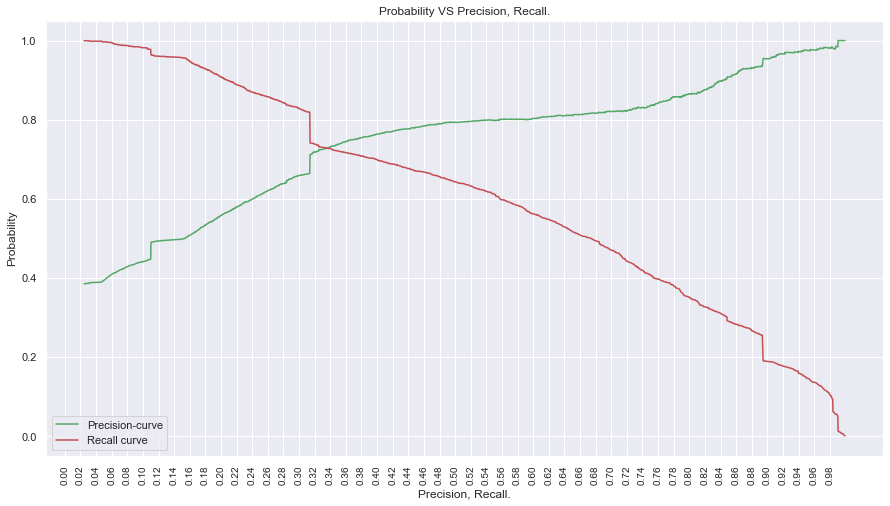

In [120]:
# plotting Precision - Recall curve.
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_Prob)
plt.figure(figsize=(15, 8))
plt.plot(thresholds, p[:-1], "g-",label='Precision-curve')
plt.plot(thresholds, r[:-1], "r-",label='Recall curve')
plt.legend()
plt.xticks(np.arange(0,1,step=.02), size=10,rotation =90)
plt.xlabel('Precision, Recall.')
plt.ylabel('Probability')
plt.title('Probability VS Precision, Recall.')
plt.show()

- According to Precession-recall trade off graph optimal cut off value is found at 0.32 threshold.

### 9. Making predictions on the test set.

In [121]:
#Scaler transformation on test data.
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])


In [122]:
# Extracting data from important features.
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,What is your current occupation_Other-Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
3504,0,-0.103815,0,0,0,0,0,0,0,1,0
4050,0,-0.881052,1,0,0,0,0,0,0,1,0
7201,1,0.424120,0,0,0,0,0,0,0,1,0
1196,0,-0.105648,0,0,0,0,0,0,0,1,0
8219,0,-0.428274,0,0,0,0,0,0,0,1,0


In [123]:
#Making Prediction on test Set. 
X_test_sm = sm.add_constant(X_test)
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3504    0.300294
4050    0.893556
7201    0.166216
1196    0.299867
8219    0.230390
8747    0.109988
9048    0.301310
6524    0.204445
7693    0.059384
8187    0.893556
dtype: float64

In [124]:
# Defining Final y_test_pred_df.

y_test_pred_df = pd.DataFrame({'Converted':y_test.values,'Converted_Prob':y_test_pred.values,'Prospect ID':y_test_pred.index})
y_test_pred_df.head()

,Converted,Converted_Prob,Prospect ID
0,0,0.300294,3504
1,1,0.893556,4050
2,0,0.166216,7201
3,0,0.299867,1196
4,1,0.230390,8219


In [125]:
# Making prediction on test data with 0.3 final cut-off.
y_test_pred_df['final_predicted'] = y_test_pred_df.Converted_Prob.map(lambda x: 1 if x > 0.3 else 0)

In [126]:
#Displaying top-5 rows.
y_test_pred_df.head()

,Converted,Converted_Prob,Prospect ID,final_predicted
0,0,0.300294,3504,1
1,1,0.893556,4050,1
2,0,0.166216,7201,0
3,0,0.299867,1196,0
4,1,0.230390,8219,0


In [127]:
#Test data ,Model Evaluation.
Mod_evaluation(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

Accuracy of model is  0.7792
Sensitivity of model is  0.8273
Specificity of model is  0.7496
True-Positive rate of model is  0.8273
False-Positive rate of model is  0.2504
Confusion Matrix is: 
[[1266  423]
 [ 180  862]]


In [128]:
# Precision Score.
precision_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.670817120622568

In [129]:
# Recall Score.
recall_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted)

0.8272552783109405

In [130]:
# F1-score.
metrics.f1_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted, average='weighted')

0.7821730768867495

In [131]:
#Assigning Score to test data.
y_test_pred_df['Lead_Score'] = round(y_test_pred_df['Converted_Prob'] *100,2)
y_test_pred_df.head()

,Converted,Converted_Prob,Prospect ID,final_predicted,Lead_Score
0,0,0.300294,3504,1,30.03
1,1,0.893556,4050,1,89.36
2,0,0.166216,7201,0,16.62
3,0,0.299867,1196,0,29.99
4,1,0.230390,8219,0,23.04


### 10. Evaluation  metrics on Train and Test set:

Train Data Set -
1. Accuracy of model    -  77.23%
2. Sensitivity of model -  82.84%
3. Specificity of model -  73.79%
4. True-Positive rate of model  - 82.84%
5. False-Positive rate of model - 26.21%
6. Precision Score  - 65.92%
7. Recall Score     - 82.84%
8. F1-score         - 77.55%


Test Data Set -
1. Accuracy of model    -  77.92%
2. Sensitivity of model -  82.73%
3. Specificity of model -  74.96%
4. True-Positive rate of model  - 82.73%
5. False-Positive rate of model - 25.04%
6. Precision Score  - 67.08%
7. Recall Score     - 82.72%
8. F1-score         - 78.21%

Both train and test data set have similar evaluation results and thus the model is a best fit for the data.

### 11. Finding the Lead Score on complete Data Frame

In [132]:
#Scaler transformation on leadcopy_TargetScoreEval_df data frame.
leadcopy_TargetScoreEval_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.transform(leadcopy_TargetScoreEval_df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

In [133]:
# Extracting data from important features.
X_df = leadcopy_TargetScoreEval_df[col]
X_df.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Welingak Website,Specialization_Hospitality Management,What is your current occupation_Other-Occupation,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional
0,0,-0.881052,0,0,1,0,0,0,0,1,0
1,0,0.354462,0,0,0,0,0,0,0,1,0
2,0,1.927268,0,0,0,0,0,0,1,0,0
3,0,-0.321954,0,0,0,0,0,0,0,1,0
4,0,1.736625,0,0,0,0,0,0,0,1,0


In [134]:
#Making Prediction on data frame.
X_df_sm = sm.add_constant(X_df)
y_df_pred = res.predict(X_df_sm)
y_df_pred[:5]

0    0.313757
1    0.416508
2    0.780067
3    0.251981
4    0.768051
dtype: float64

In [135]:
# Adding Predicted lead score to complete dataframe.
leadcopy_TargetScorePred_df['Lead_Score'] = round(y_df_pred*100,2)
leadcopy_TargetScorePred_df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Tags,City,A free copy of Mastering The Interview,Last Notable Activity,Lead_Score
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,No,No,No,Interested in other courses,Mumbai,No,Modified,31.38
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,No,No,No,Ringing,Mumbai,No,Email Opened,41.65
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,No,No,No,Will revert after reading the email,Mumbai,Yes,Email Opened,78.01
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,No,No,No,Ringing,Mumbai,No,Modified,25.20
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,No,No,No,Will revert after reading the email,Mumbai,No,Modified,76.81


## 12. Interpretation about the final result.

#### Characteristics equation of log of odds [log(P/(1-P))] :
Log of odds = -2.0389 + (Do Not Email × -1.3529) + (Total Time Spent on Website × 1.1102) + (Lead Origin_Lead Add Form × 3.8364) + (Lead Origin_Lead Import × 0.9781) + (Lead Source_Olark Chat × 0.9262) + (Lead Source_Welingak Website × 1.9715) + (Specialization_Hospitality Management × -0.6626) + (What is your current occupation_Other-Occupation × 1.9699) + (What is your current occupation_Student × 1.1653) + (What is your current occupation_Unemployed × 1.3083) + (What is your current occupation_Working Professional × 3.8124)

#### Top 3 influencers for Lead Conversion  :

1. Current occupation of the customer (Variable: What is your current occupation):
   - Working Professionals are more interested in course, and they have higher chance of being a potential lead.
   - Students, Unemployed and Other Occupation customers [Includes Housewife and Businessman ] tends to have a better chance of turning into converted leads.

2. Lead origin and source (Variable : Lead Origin, Lead Source):
   - Customers acquired through add forms like Olark Chat and Welingak Website have higher chance of being a potential lead (Hot Lead). 

3. Other Indicators (Variable : Do Not Email, Specialization_Hospitality Management, Total Time Spent on Website):
   - Customers who explicitly specify not to mail and some customers with Hospitality management specialization shows lesser interest in course and they tend to be cold leads.
   - If a customer’s spends more time on the website it indicates that they are interested in the course and they have higher chance of being a potential leads.


***--- End Of the case study ---***